In [1]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import util
from class_format_data import FormatData

In [2]:
format_data = FormatData()
equipment = 'FD003'

# Análise exploratória dos dados de treino

In [3]:
format_data.format_raw_data(f"test_{equipment}.txt")

df_test = format_data.get_format_data(f"test_{equipment}.txt")

In [4]:
df_test

,unit_number,time,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1.0,1.0,-0.0017,-0.0004,100.0,518.67,641.94,1581.93,1396.93,14.62,...,521.89,2387.94,8133.48,8.3760,0.03,391.0,2388.0,100.0,39.07,23.4468
1,1.0,2.0,0.0006,-0.0002,100.0,518.67,642.02,1584.86,1398.90,14.62,...,521.85,2388.01,8137.44,8.4062,0.03,391.0,2388.0,100.0,39.04,23.4807
2,1.0,3.0,0.0014,-0.0003,100.0,518.67,641.68,1581.78,1391.92,14.62,...,522.10,2387.94,8138.25,8.3553,0.03,391.0,2388.0,100.0,39.10,23.4244
3,1.0,4.0,0.0027,0.0001,100.0,518.67,642.20,1584.53,1395.34,14.62,...,522.45,2387.96,8137.07,8.3709,0.03,392.0,2388.0,100.0,38.97,23.4782
4,1.0,5.0,-0.0001,0.0001,100.0,518.67,642.46,1589.03,1395.86,14.62,...,521.91,2387.97,8134.20,8.4146,0.03,391.0,2388.0,100.0,39.09,23.3950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,100.0,243.0,0.0011,-0.0003,100.0,518.67,643.04,1594.99,1411.28,14.62,...,529.23,2388.24,8162.24,8.2939,0.03,395.0,2388.0,100.0,39.40,23.4949
16592,100.0,244.0,-0.0024,0.0002,100.0,518.67,642.47,1591.27,1417.64,14.62,...,529.27,2388.26,8163.24,8.3247,0.03,394.0,2388.0,100.0,39.42,23.6011
16593,100.0,245.0,-0.0053,0.0002,100.0,518.67,642.70,1593.81,1412.70,14.62,...,529.48,2388.28,8162.12,8.3264,0.03,394.0,2388.0,100.0,39.43,23.5482
16594,100.0,246.0,-0.0006,0.0001,100.0,518.67,642.19,1595.63,1406.58,14.62,...,529.39,2388.33,8164.20,8.2908,0.03,395.0,2388.0,100.0,39.40,23.6687


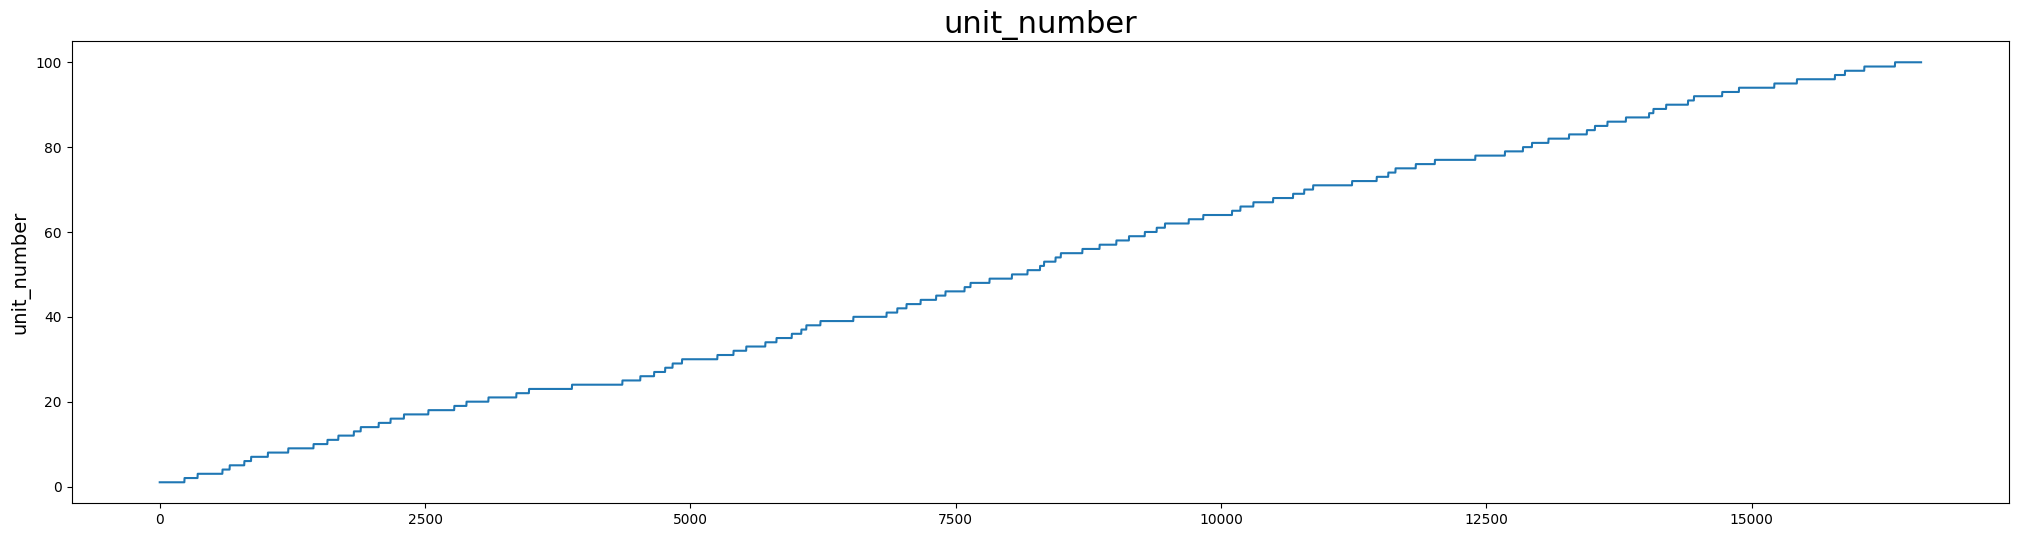

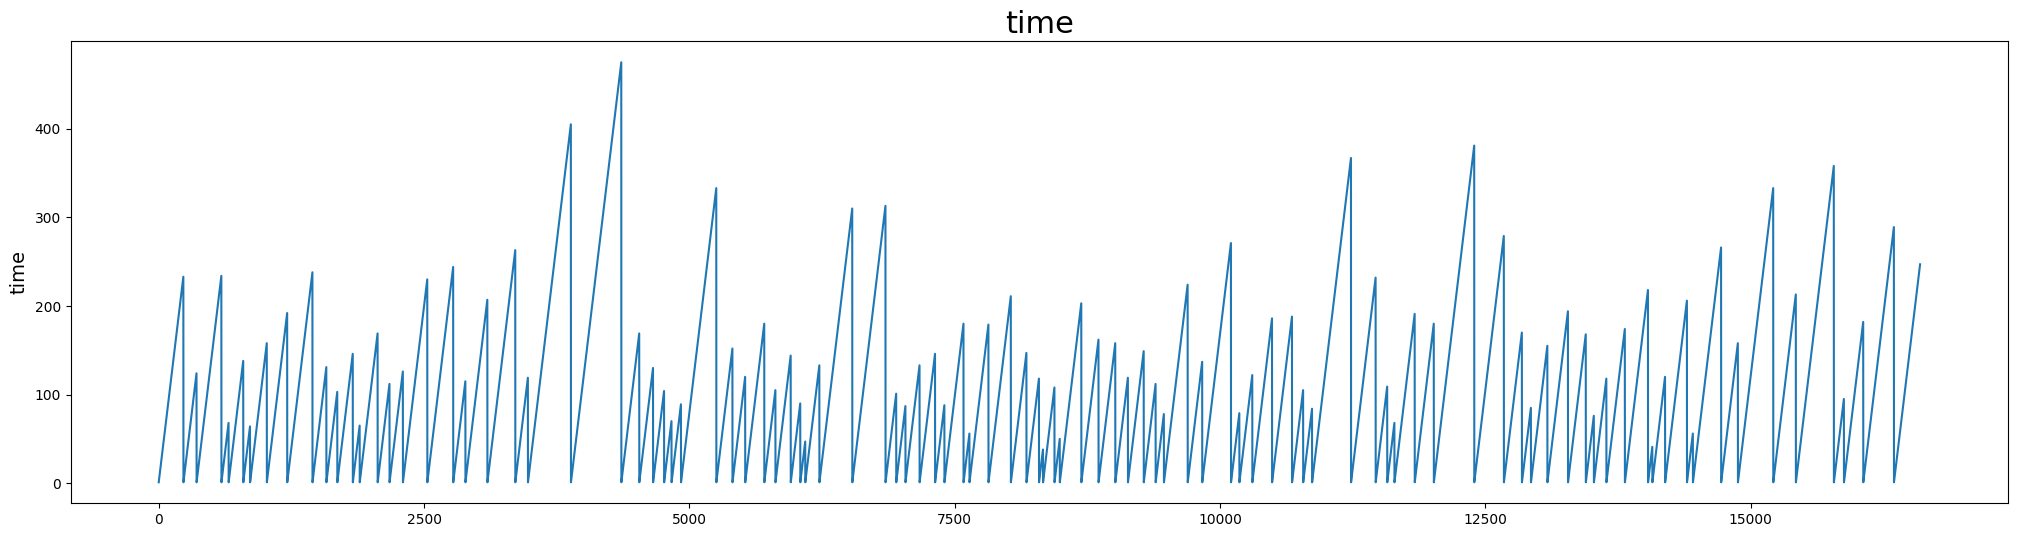

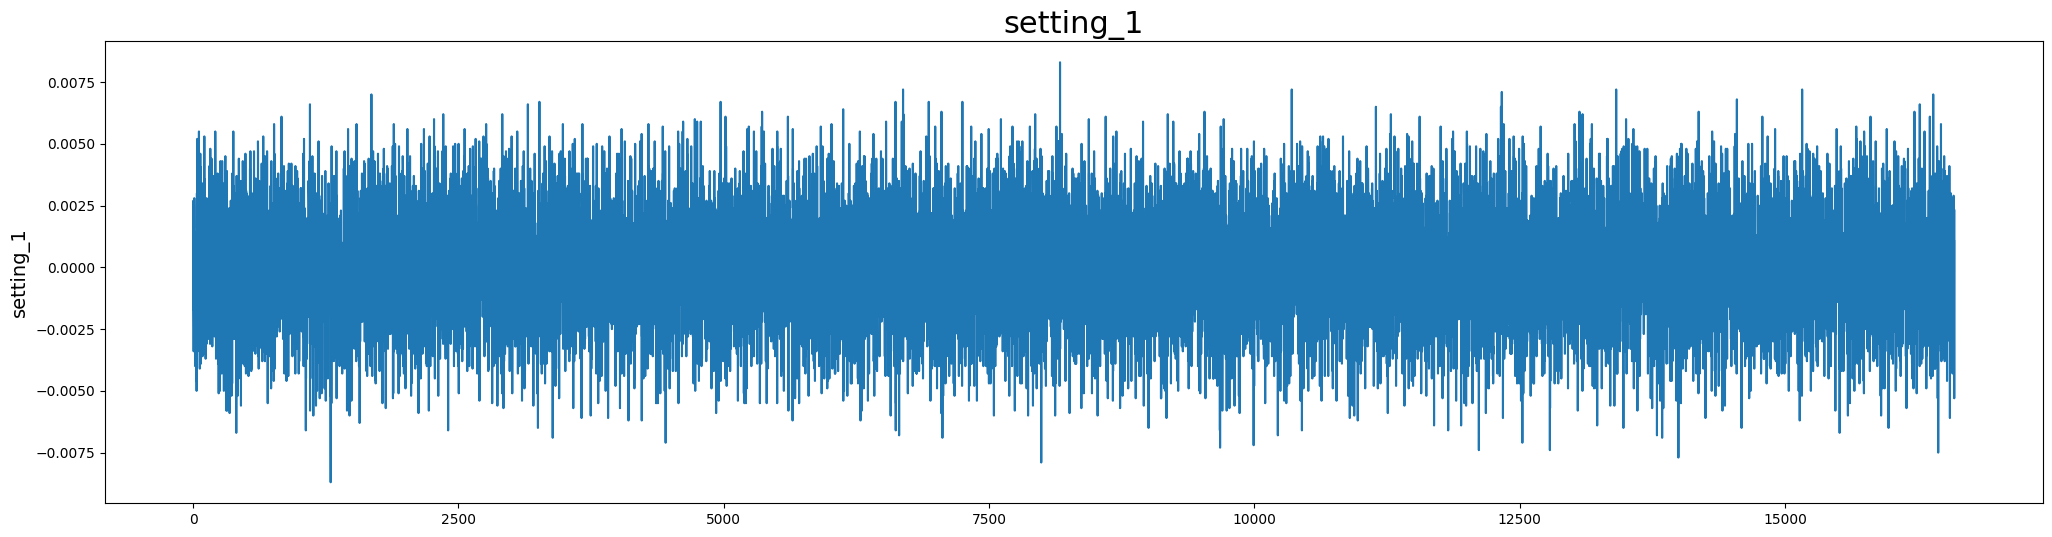

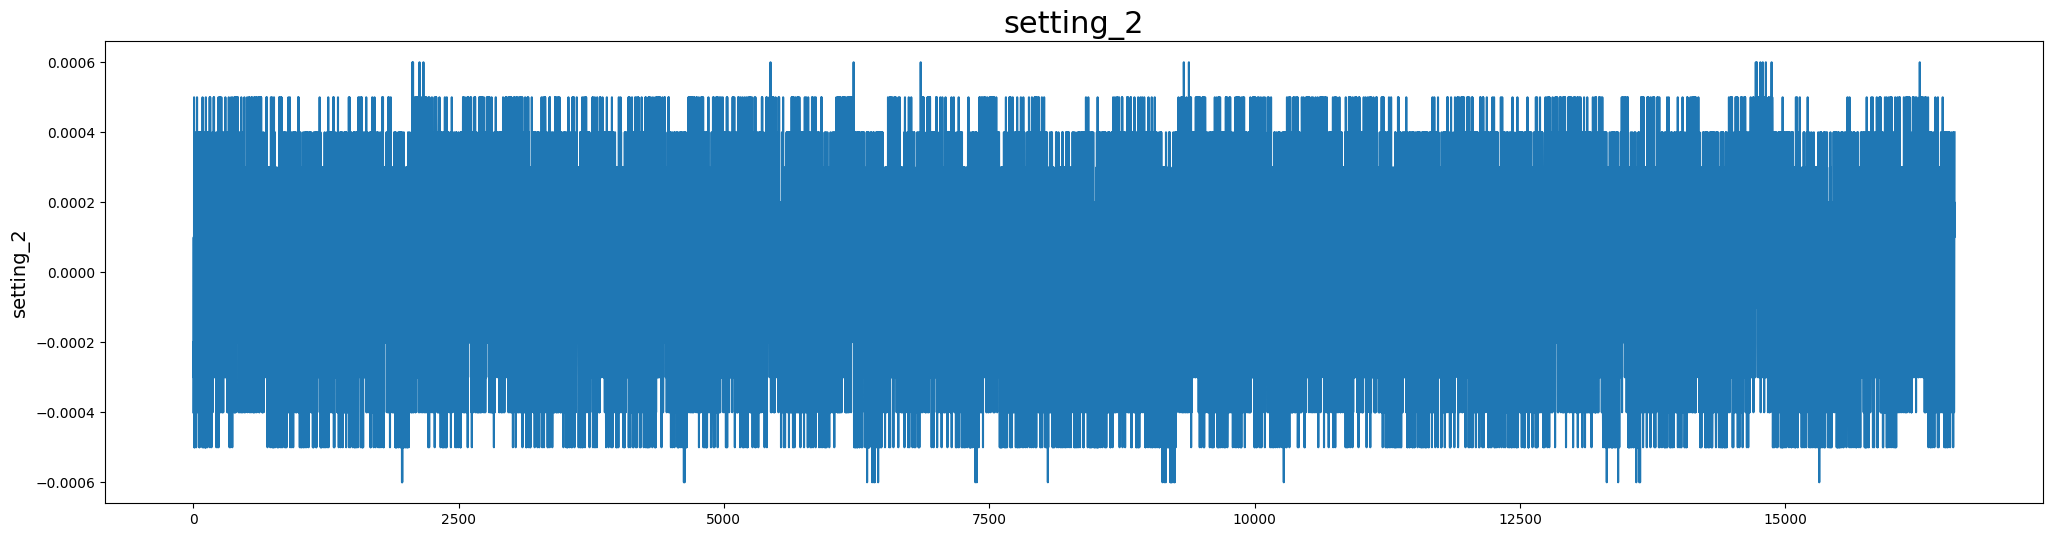

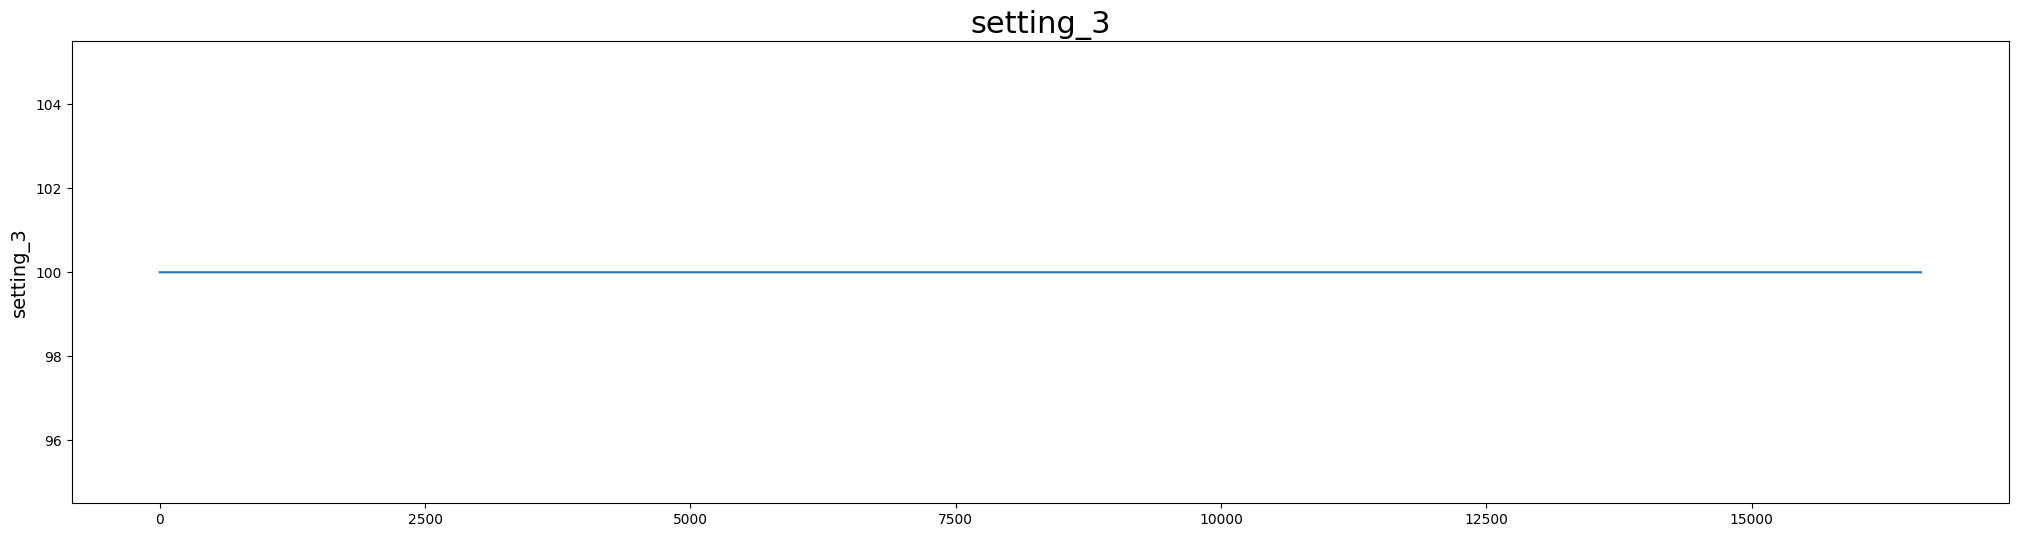

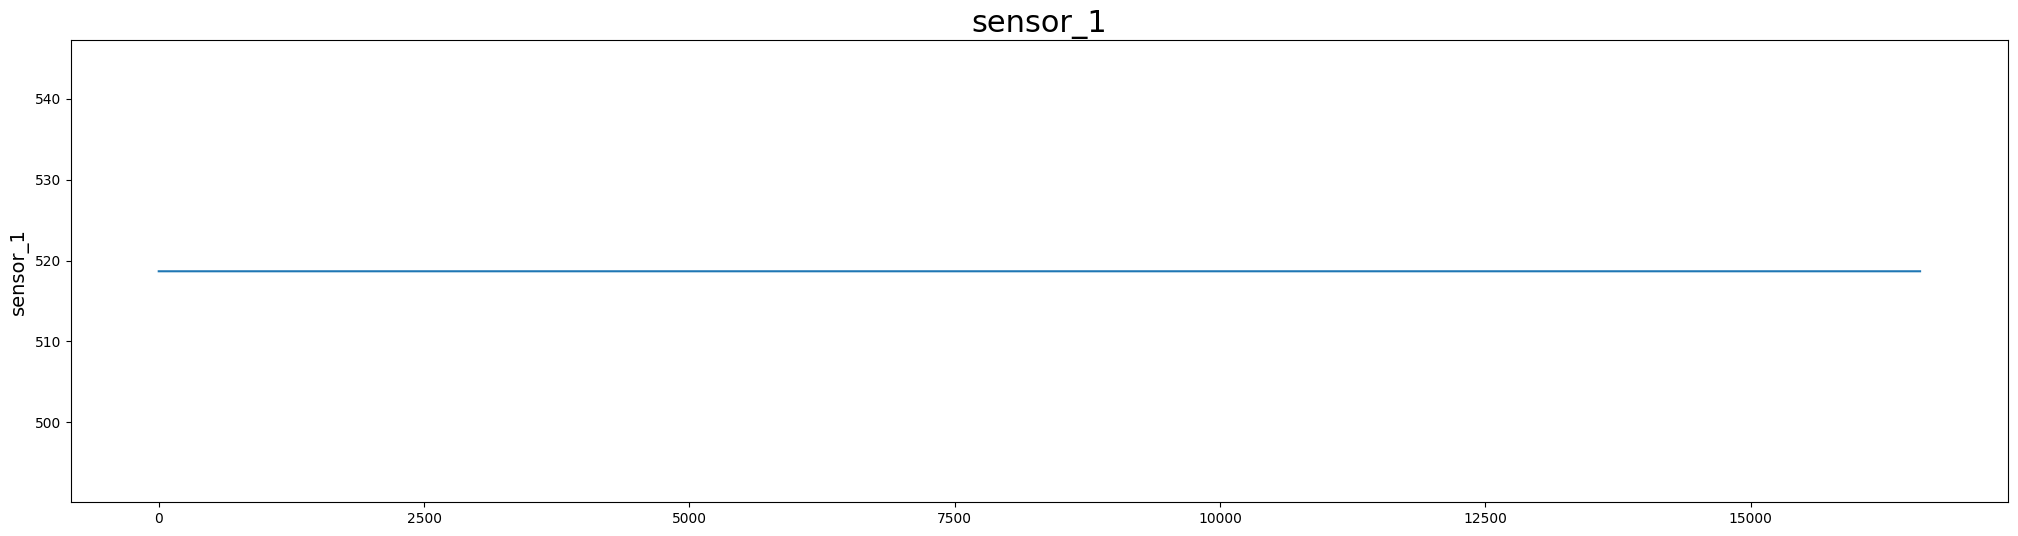

In [5]:
i = 0
for column in df_test.columns:
    fig, ax = plt.subplots(figsize=(25, 6))
    ax.plot(df_test[column])
    ax.set_ylabel(column, fontsize=14)
    ax.set_title(column, fontsize=22)
    i = i + 1
    if i == 6:
        break

Pode-se observar que há sensores que estão flat, ou seja, estão com valor fixo durante todo tempo. Esses sensores deverão ser removidos. Para identifica-los, será usado a variância. Se um sensor tiver uma variância muito pequena, ele será considerado como flat.

In [6]:
df_test["sensor_16"].var()

1.9260459992196784e-34

In [7]:
good_sensor = list(df_test.columns)
for sensor in df_test.columns:
    if df_test[sensor].var() <= 0.00000001:
        print("Sensor is flat:", sensor)
        good_sensor.remove(sensor)

Sensor is flat: setting_3
Sensor is flat: sensor_1
Sensor is flat: sensor_5
Sensor is flat: sensor_16
Sensor is flat: sensor_18
Sensor is flat: sensor_19


In [8]:
df_test = df_test[good_sensor]
df_test

,unit_number,time,setting_1,setting_2,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21
0,1.0,1.0,-0.0017,-0.0004,641.94,1581.93,1396.93,21.58,554.56,2387.93,9048.65,1.30,47.09,521.89,2387.94,8133.48,8.3760,391.0,39.07,23.4468
1,1.0,2.0,0.0006,-0.0002,642.02,1584.86,1398.90,21.58,554.10,2387.94,9046.53,1.30,47.08,521.85,2388.01,8137.44,8.4062,391.0,39.04,23.4807
2,1.0,3.0,0.0014,-0.0003,641.68,1581.78,1391.92,21.58,554.41,2387.97,9054.92,1.30,47.15,522.10,2387.94,8138.25,8.3553,391.0,39.10,23.4244
3,1.0,4.0,0.0027,0.0001,642.20,1584.53,1395.34,21.59,554.58,2387.94,9055.04,1.30,47.26,522.45,2387.96,8137.07,8.3709,392.0,38.97,23.4782
4,1.0,5.0,-0.0001,0.0001,642.46,1589.03,1395.86,21.58,554.16,2388.01,9048.59,1.30,46.94,521.91,2387.97,8134.20,8.4146,391.0,39.09,23.3950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,100.0,243.0,0.0011,-0.0003,643.04,1594.99,1411.28,21.58,561.21,2388.24,9088.31,1.31,47.61,529.23,2388.24,8162.24,8.2939,395.0,39.40,23.4949
16592,100.0,244.0,-0.0024,0.0002,642.47,1591.27,1417.64,21.58,561.02,2388.29,9085.35,1.31,47.75,529.27,2388.26,8163.24,8.3247,394.0,39.42,23.6011
16593,100.0,245.0,-0.0053,0.0002,642.70,1593.81,1412.70,21.58,561.16,2388.23,9084.29,1.31,47.60,529.48,2388.28,8162.12,8.3264,394.0,39.43,23.5482
16594,100.0,246.0,-0.0006,0.0001,642.19,1595.63,1406.58,21.58,562.66,2388.24,9092.52,1.31,47.69,529.39,2388.33,8164.20,8.2908,395.0,39.40,23.6687


In [9]:
df_test

,unit_number,time,setting_1,setting_2,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21
0,1.0,1.0,-0.0017,-0.0004,641.94,1581.93,1396.93,21.58,554.56,2387.93,9048.65,1.30,47.09,521.89,2387.94,8133.48,8.3760,391.0,39.07,23.4468
1,1.0,2.0,0.0006,-0.0002,642.02,1584.86,1398.90,21.58,554.10,2387.94,9046.53,1.30,47.08,521.85,2388.01,8137.44,8.4062,391.0,39.04,23.4807
2,1.0,3.0,0.0014,-0.0003,641.68,1581.78,1391.92,21.58,554.41,2387.97,9054.92,1.30,47.15,522.10,2387.94,8138.25,8.3553,391.0,39.10,23.4244
3,1.0,4.0,0.0027,0.0001,642.20,1584.53,1395.34,21.59,554.58,2387.94,9055.04,1.30,47.26,522.45,2387.96,8137.07,8.3709,392.0,38.97,23.4782
4,1.0,5.0,-0.0001,0.0001,642.46,1589.03,1395.86,21.58,554.16,2388.01,9048.59,1.30,46.94,521.91,2387.97,8134.20,8.4146,391.0,39.09,23.3950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,100.0,243.0,0.0011,-0.0003,643.04,1594.99,1411.28,21.58,561.21,2388.24,9088.31,1.31,47.61,529.23,2388.24,8162.24,8.2939,395.0,39.40,23.4949
16592,100.0,244.0,-0.0024,0.0002,642.47,1591.27,1417.64,21.58,561.02,2388.29,9085.35,1.31,47.75,529.27,2388.26,8163.24,8.3247,394.0,39.42,23.6011
16593,100.0,245.0,-0.0053,0.0002,642.70,1593.81,1412.70,21.58,561.16,2388.23,9084.29,1.31,47.60,529.48,2388.28,8162.12,8.3264,394.0,39.43,23.5482
16594,100.0,246.0,-0.0006,0.0001,642.19,1595.63,1406.58,21.58,562.66,2388.24,9092.52,1.31,47.69,529.39,2388.33,8164.20,8.2908,395.0,39.40,23.6687


## Criação da feature RUL (Remaining  Useful  Life)

In [10]:
df_test_rul = pd.DataFrame(df_test.groupby('unit_number')['time'].max()).reset_index()
df_test_rul.columns = ['id', 'max']
df_test_rul

,id,max
0,1.0,233.0
1,2.0,124.0
2,3.0,234.0
3,4.0,68.0
4,5.0,138.0
...,...,...
95,96.0,358.0
96,97.0,95.0
97,98.0,182.0
98,99.0,289.0


In [11]:
df_rul = format_data.read_txt_rul(f'RUL_{equipment}.txt')
df_rul

,max,unit_number
0,44.0,1
1,51.0,2
2,27.0,3
3,120.0,4
4,101.0,5
...,...,...
95,113.0,96
96,123.0,97
97,17.0,98
98,8.0,99


In [12]:
df_rul['TOTAL_RUL'] = df_test_rul['max'] + df_rul['max']
df_rul

,max,unit_number,TOTAL_RUL
0,44.0,1,277.0
1,51.0,2,175.0
2,27.0,3,261.0
3,120.0,4,188.0
4,101.0,5,239.0
...,...,...,...
95,113.0,96,471.0
96,123.0,97,218.0
97,17.0,98,199.0
98,8.0,99,297.0


In [13]:
df_rul = df_rul.drop(columns=["max"])

In [14]:
df_test.merge(df_rul, on=['unit_number'], how='left').head(8)

,unit_number,time,setting_1,setting_2,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,...,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,TOTAL_RUL
0,1.0,1.0,-0.0017,-0.0004,641.94,1581.93,1396.93,21.58,554.56,2387.93,...,1.3,47.09,521.89,2387.94,8133.48,8.3760,391.0,39.07,23.4468,277.0
1,1.0,2.0,0.0006,-0.0002,642.02,1584.86,1398.90,21.58,554.10,2387.94,...,1.3,47.08,521.85,2388.01,8137.44,8.4062,391.0,39.04,23.4807,277.0
2,1.0,3.0,0.0014,-0.0003,641.68,1581.78,1391.92,21.58,554.41,2387.97,...,1.3,47.15,522.10,2387.94,8138.25,8.3553,391.0,39.10,23.4244,277.0
3,1.0,4.0,0.0027,0.0001,642.20,1584.53,1395.34,21.59,554.58,2387.94,...,1.3,47.26,522.45,2387.96,8137.07,8.3709,392.0,38.97,23.4782,277.0
4,1.0,5.0,-0.0001,0.0001,642.46,1589.03,1395.86,21.58,554.16,2388.01,...,1.3,46.94,521.91,2387.97,8134.20,8.4146,391.0,39.09,23.3950,277.0
5,1.0,6.0,-0.0034,0.0001,641.74,1582.87,1397.04,21.58,554.48,2388.01,...,1.3,47.14,522.59,2388.05,8134.28,8.3647,390.0,38.98,23.4050,277.0
6,1.0,7.0,0.0009,-0.0003,642.21,1582.20,1396.77,21.59,554.37,2387.98,...,1.3,47.04,522.65,2388.02,8140.20,8.3942,390.0,39.00,23.3512,277.0
7,1.0,8.0,-0.0004,-0.0003,641.90,1582.12,1400.20,21.58,554.47,2388.04,...,1.3,47.14,522.53,2387.99,8137.84,8.3864,391.0,39.12,23.4069,277.0


In [15]:
df_test = df_test.merge(df_rul, on=['unit_number'], how='left')
df_test['RUL'] = df_test['TOTAL_RUL'] - df_test['time']
df_test.drop('TOTAL_RUL', axis=1, inplace=True)
df_test

,unit_number,time,setting_1,setting_2,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,...,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,RUL
0,1.0,1.0,-0.0017,-0.0004,641.94,1581.93,1396.93,21.58,554.56,2387.93,...,1.30,47.09,521.89,2387.94,8133.48,8.3760,391.0,39.07,23.4468,276.0
1,1.0,2.0,0.0006,-0.0002,642.02,1584.86,1398.90,21.58,554.10,2387.94,...,1.30,47.08,521.85,2388.01,8137.44,8.4062,391.0,39.04,23.4807,275.0
2,1.0,3.0,0.0014,-0.0003,641.68,1581.78,1391.92,21.58,554.41,2387.97,...,1.30,47.15,522.10,2387.94,8138.25,8.3553,391.0,39.10,23.4244,274.0
3,1.0,4.0,0.0027,0.0001,642.20,1584.53,1395.34,21.59,554.58,2387.94,...,1.30,47.26,522.45,2387.96,8137.07,8.3709,392.0,38.97,23.4782,273.0
4,1.0,5.0,-0.0001,0.0001,642.46,1589.03,1395.86,21.58,554.16,2388.01,...,1.30,46.94,521.91,2387.97,8134.20,8.4146,391.0,39.09,23.3950,272.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,100.0,243.0,0.0011,-0.0003,643.04,1594.99,1411.28,21.58,561.21,2388.24,...,1.31,47.61,529.23,2388.24,8162.24,8.2939,395.0,39.40,23.4949,32.0
16592,100.0,244.0,-0.0024,0.0002,642.47,1591.27,1417.64,21.58,561.02,2388.29,...,1.31,47.75,529.27,2388.26,8163.24,8.3247,394.0,39.42,23.6011,31.0
16593,100.0,245.0,-0.0053,0.0002,642.70,1593.81,1412.70,21.58,561.16,2388.23,...,1.31,47.60,529.48,2388.28,8162.12,8.3264,394.0,39.43,23.5482,30.0
16594,100.0,246.0,-0.0006,0.0001,642.19,1595.63,1406.58,21.58,562.66,2388.24,...,1.31,47.69,529.39,2388.33,8164.20,8.2908,395.0,39.40,23.6687,29.0


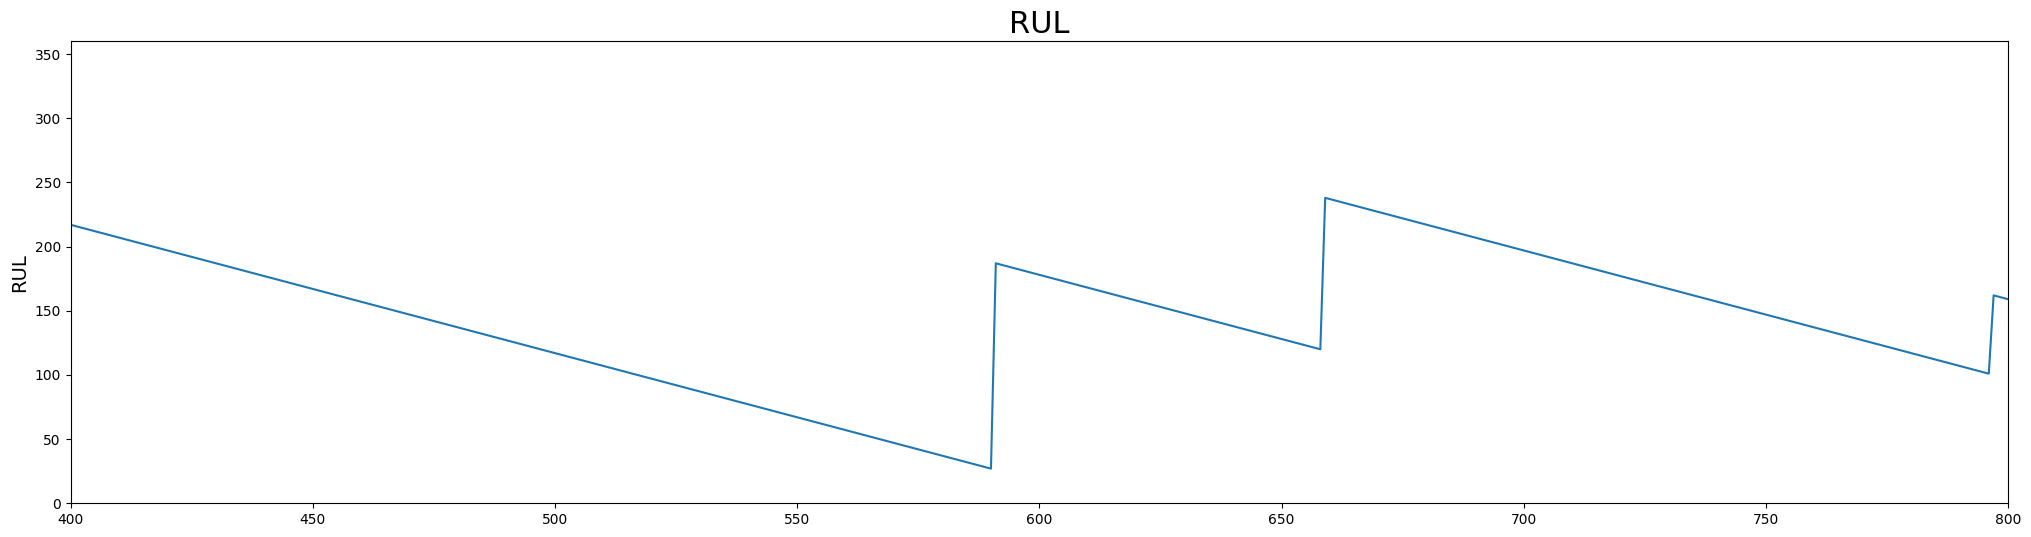

In [16]:
fig, ax = plt.subplots(figsize=(25, 6))
ax.plot(df_test.index.values, df_test["RUL"].values)
ax.set_ylabel("RUL", fontsize=14)
ax.set_title("RUL", fontsize=22)
ax.set_xlim(400,800)
ax.set_ylim(0,360)
plt.show()

Plot de um curto período dos sensores

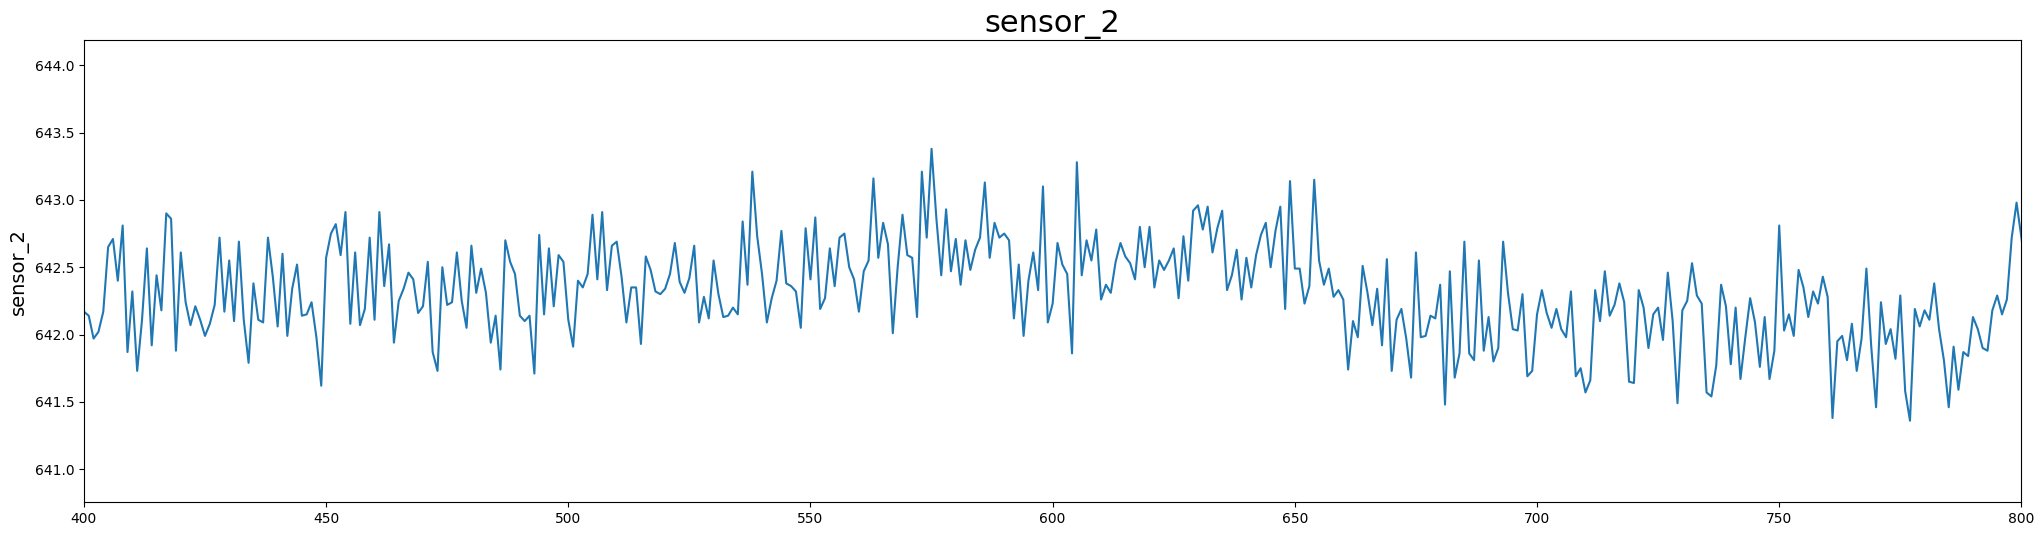

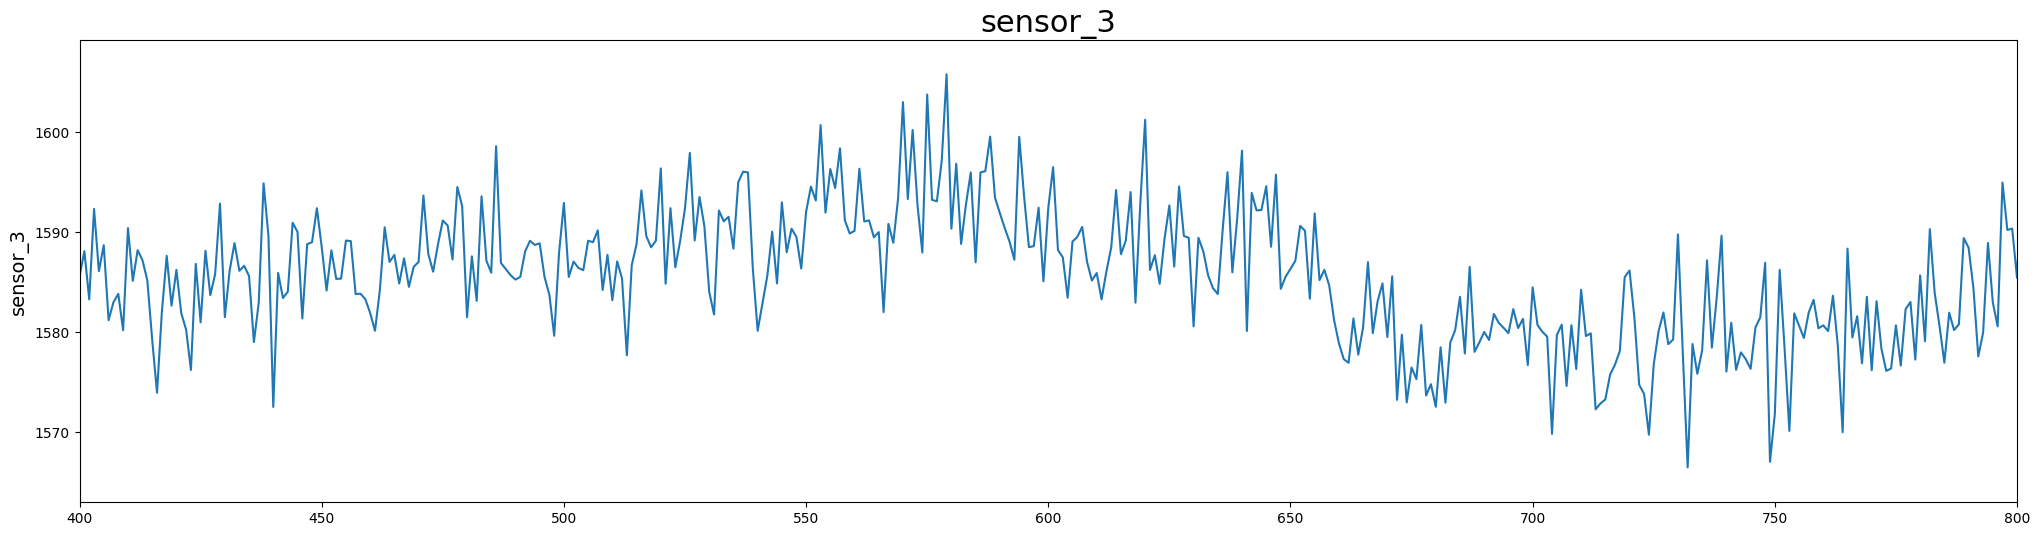

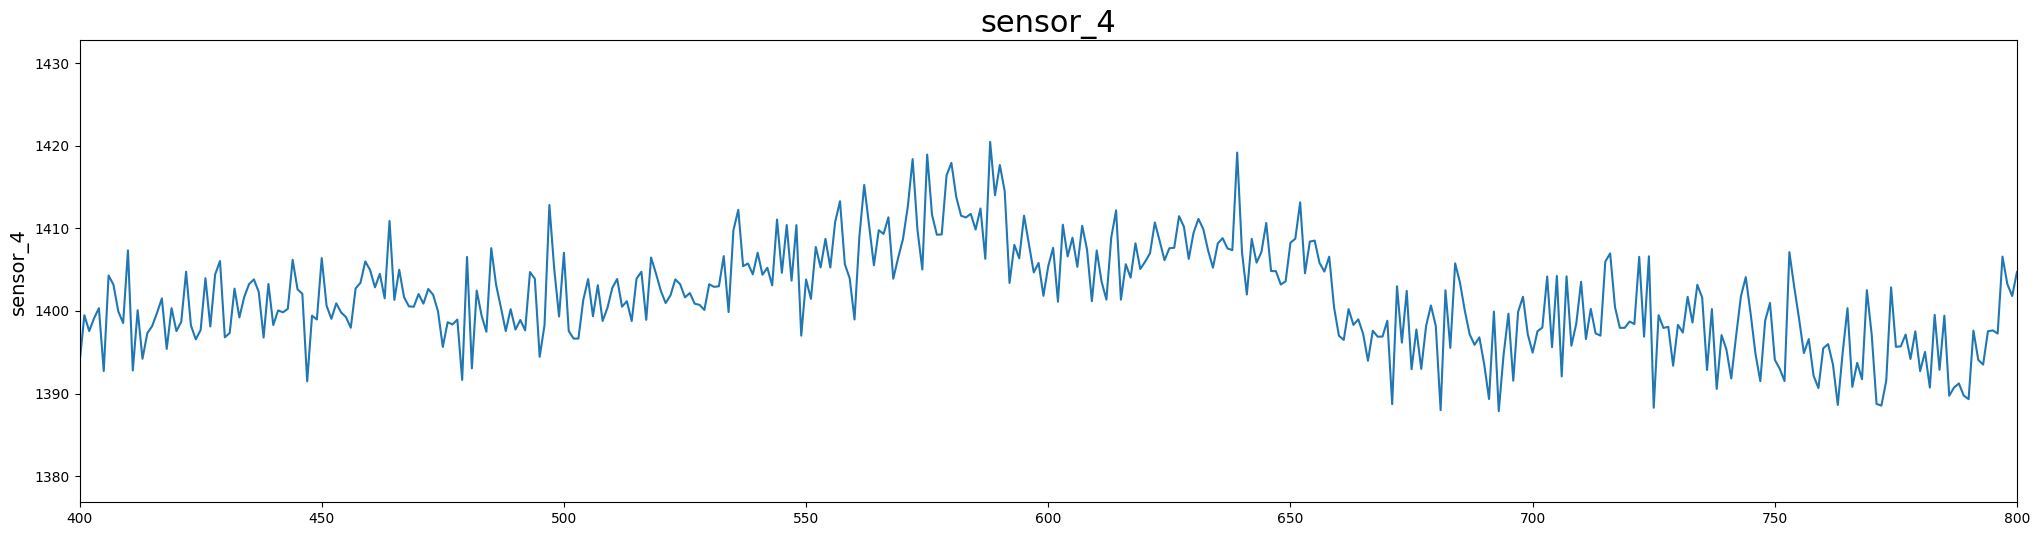

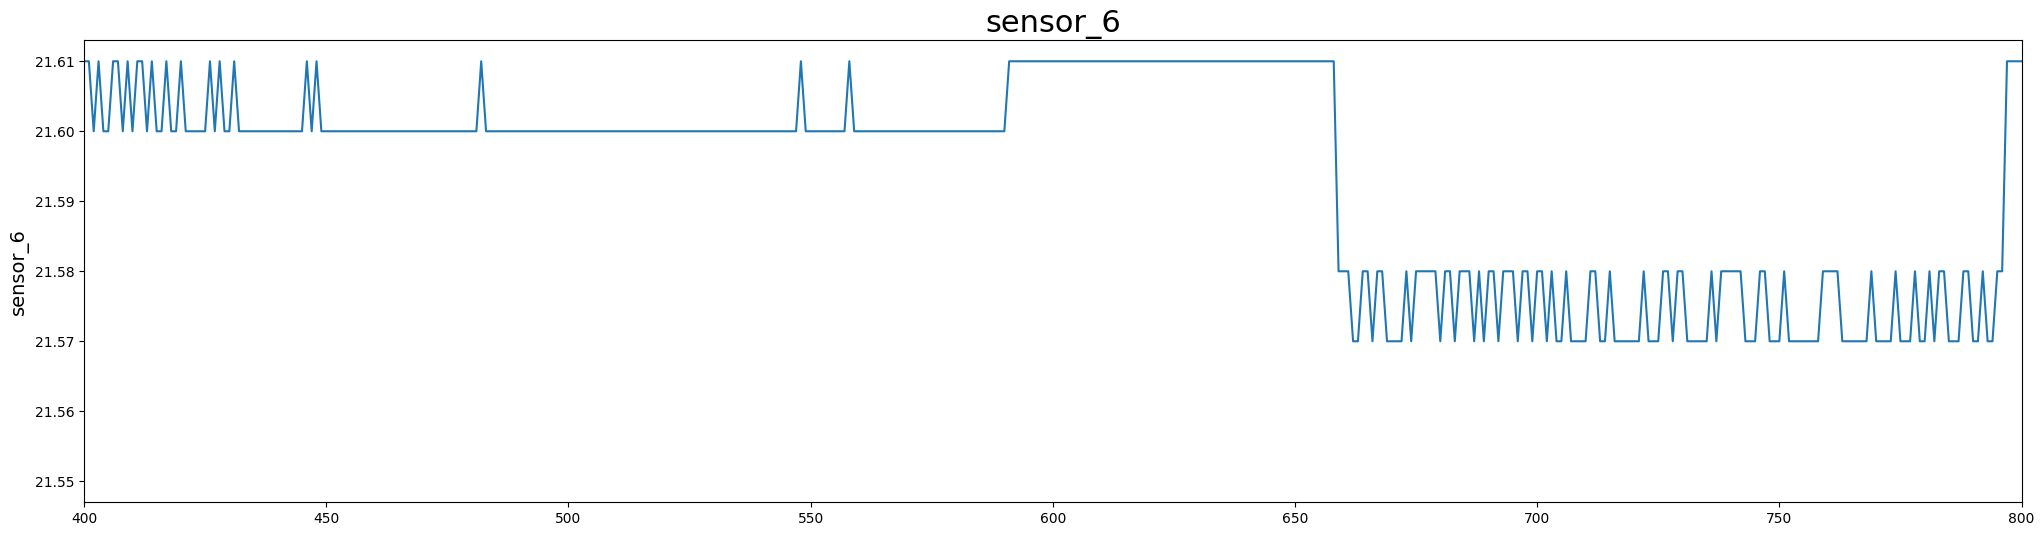

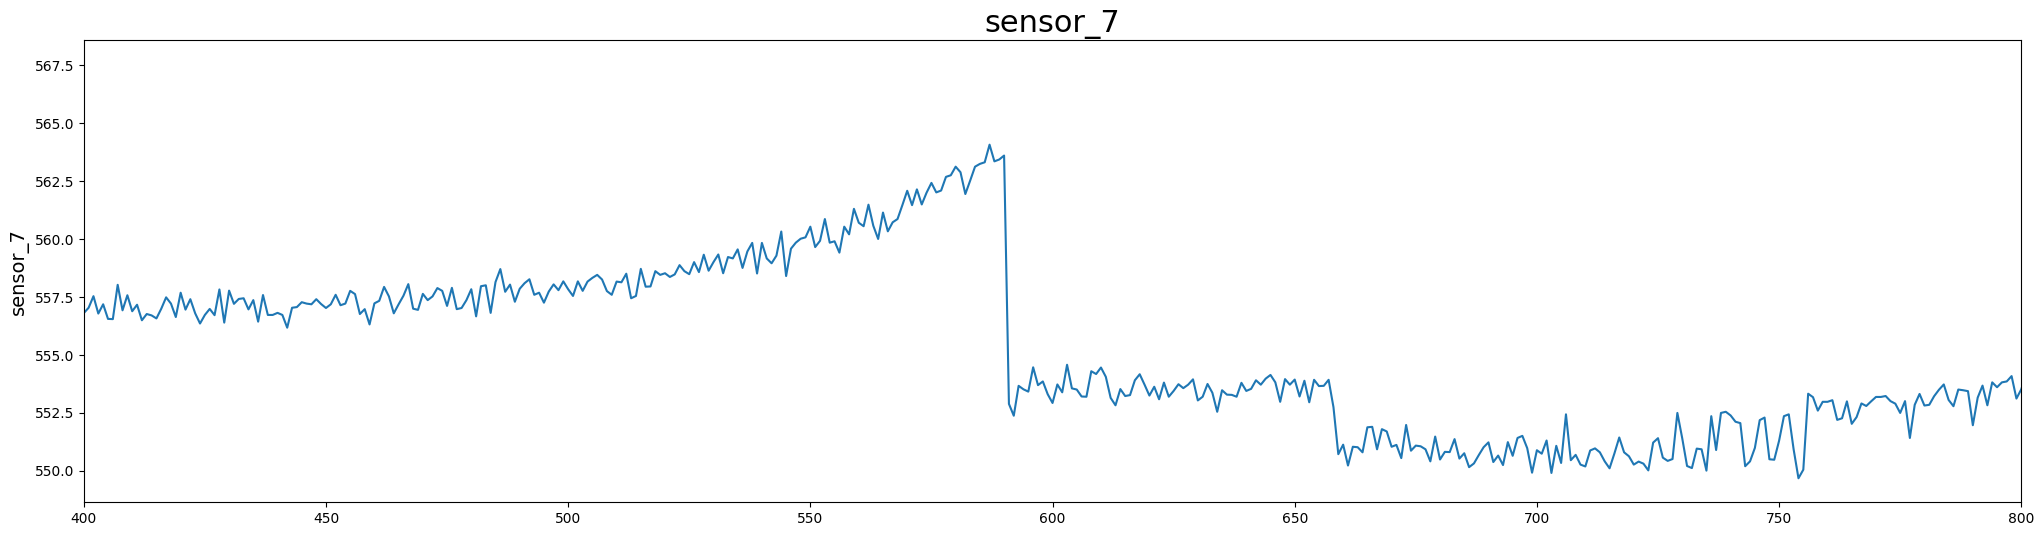

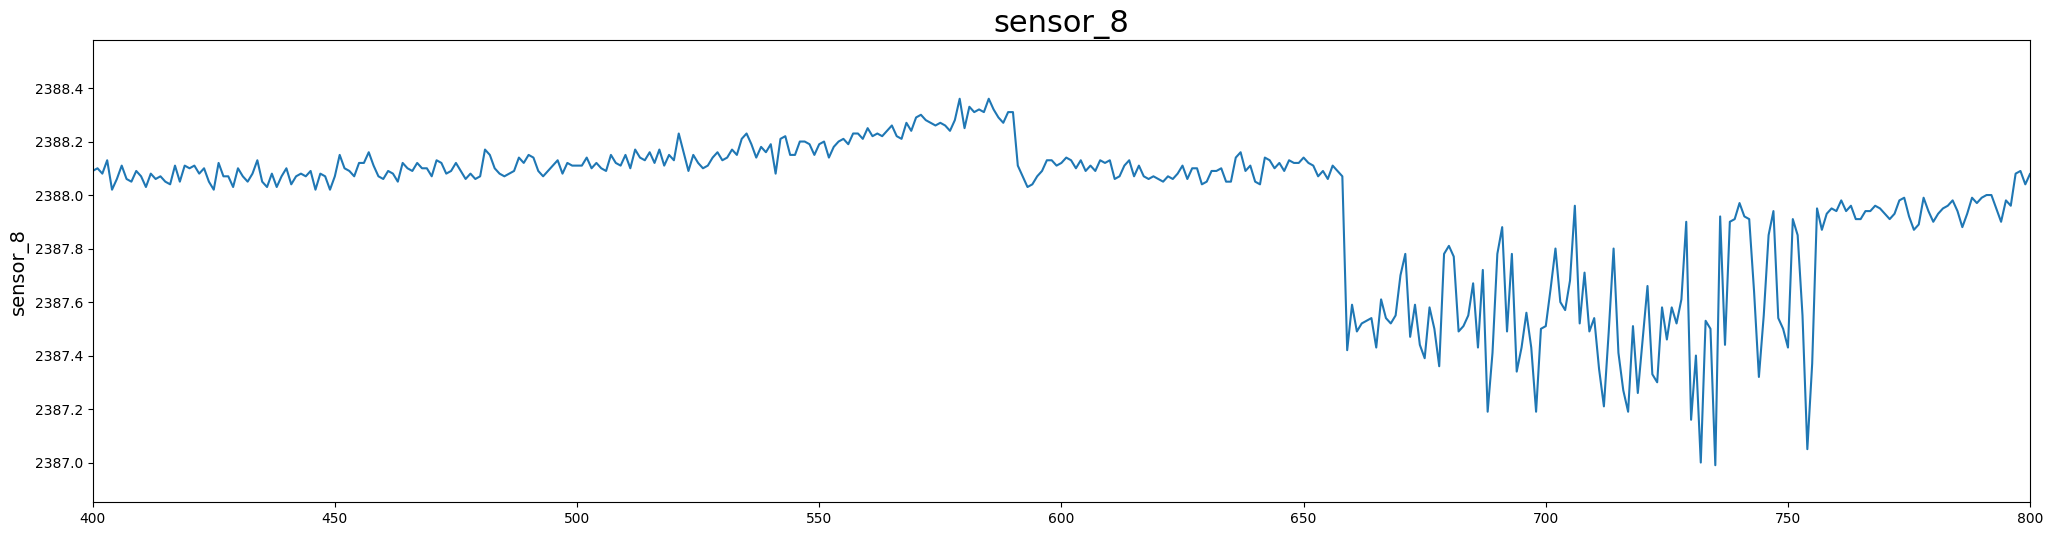

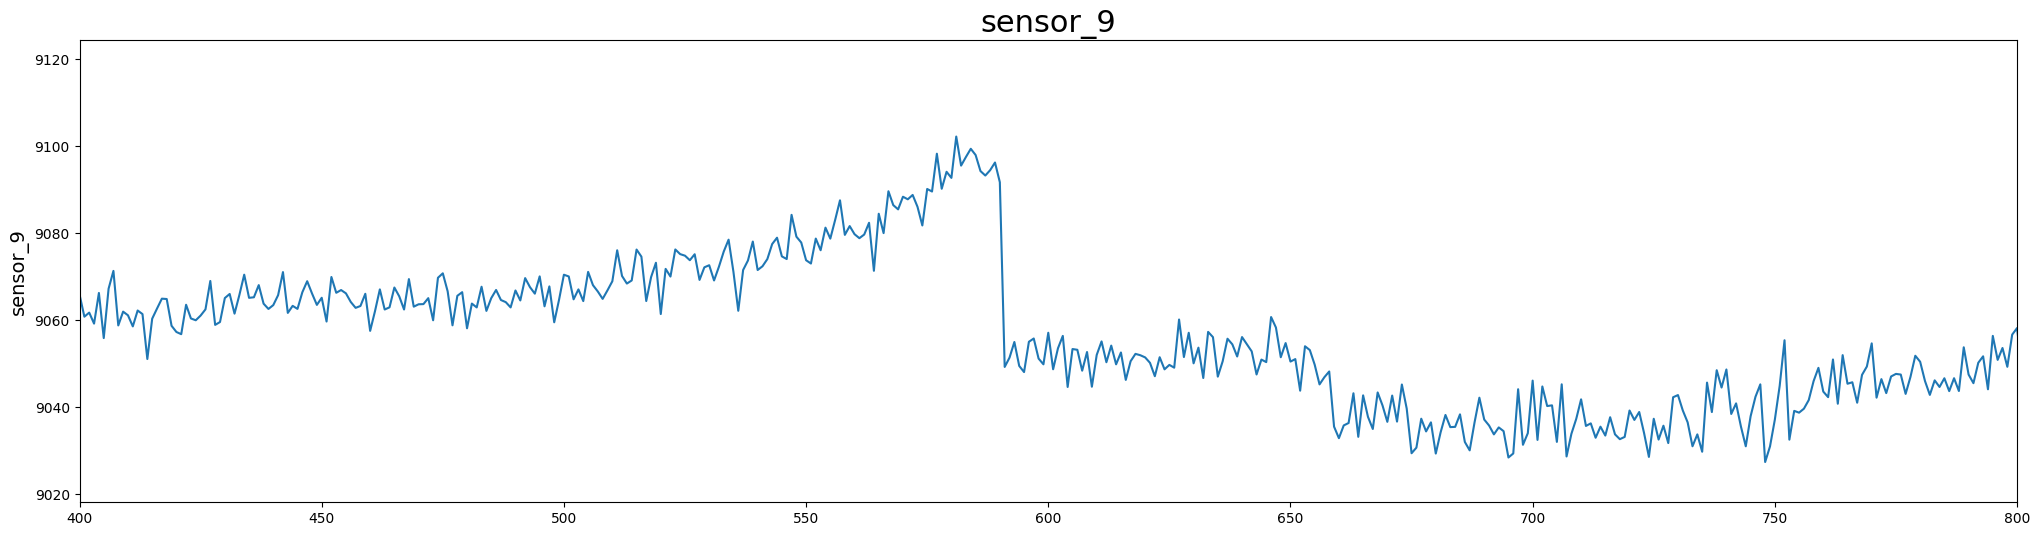

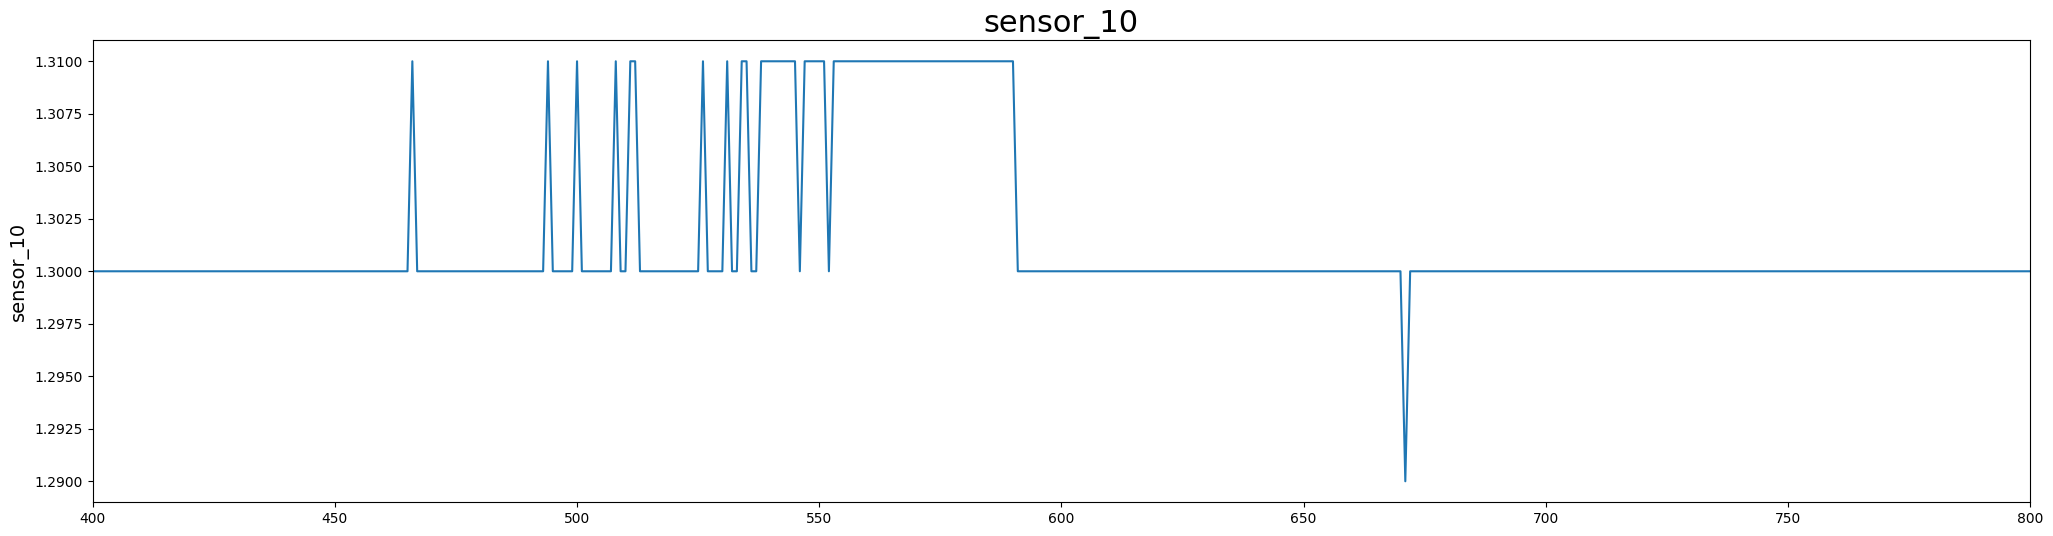

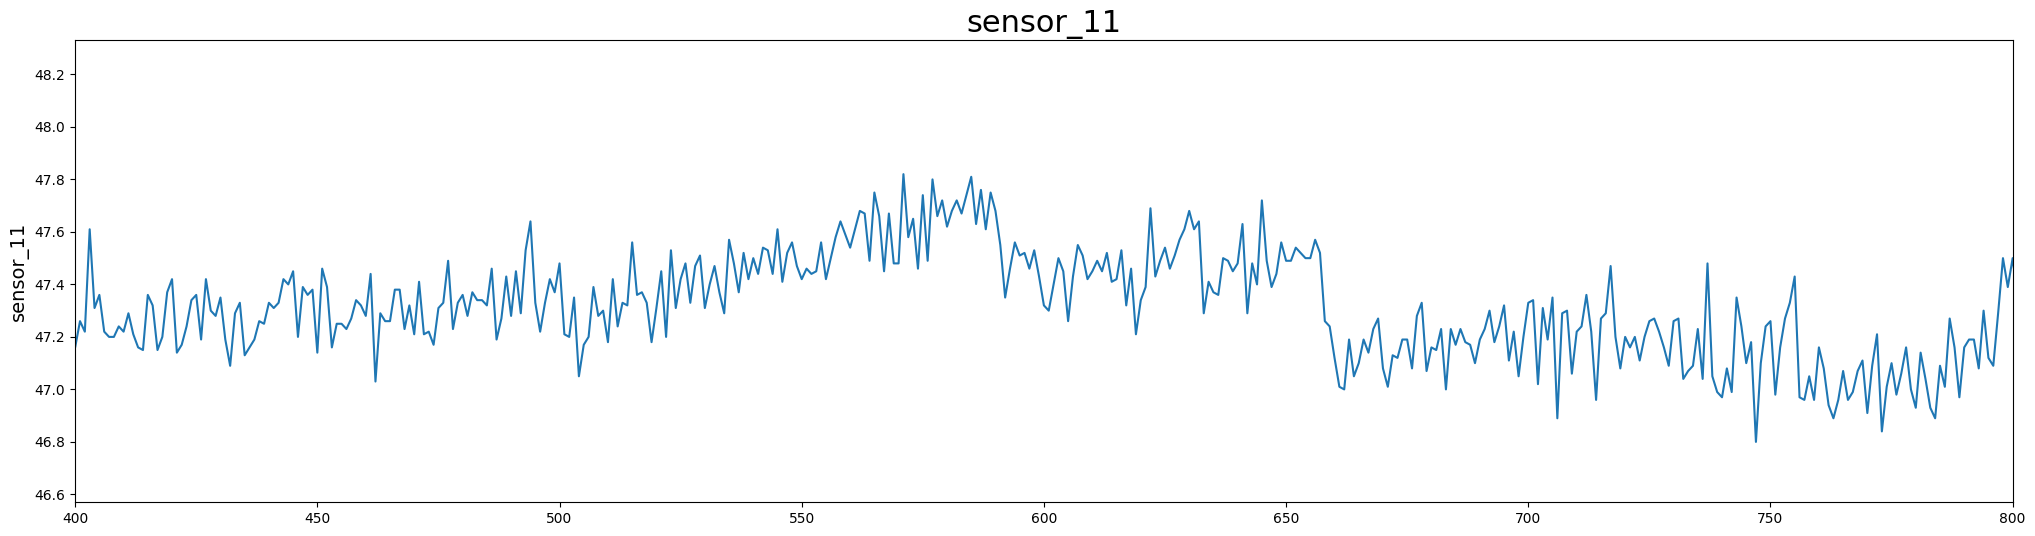

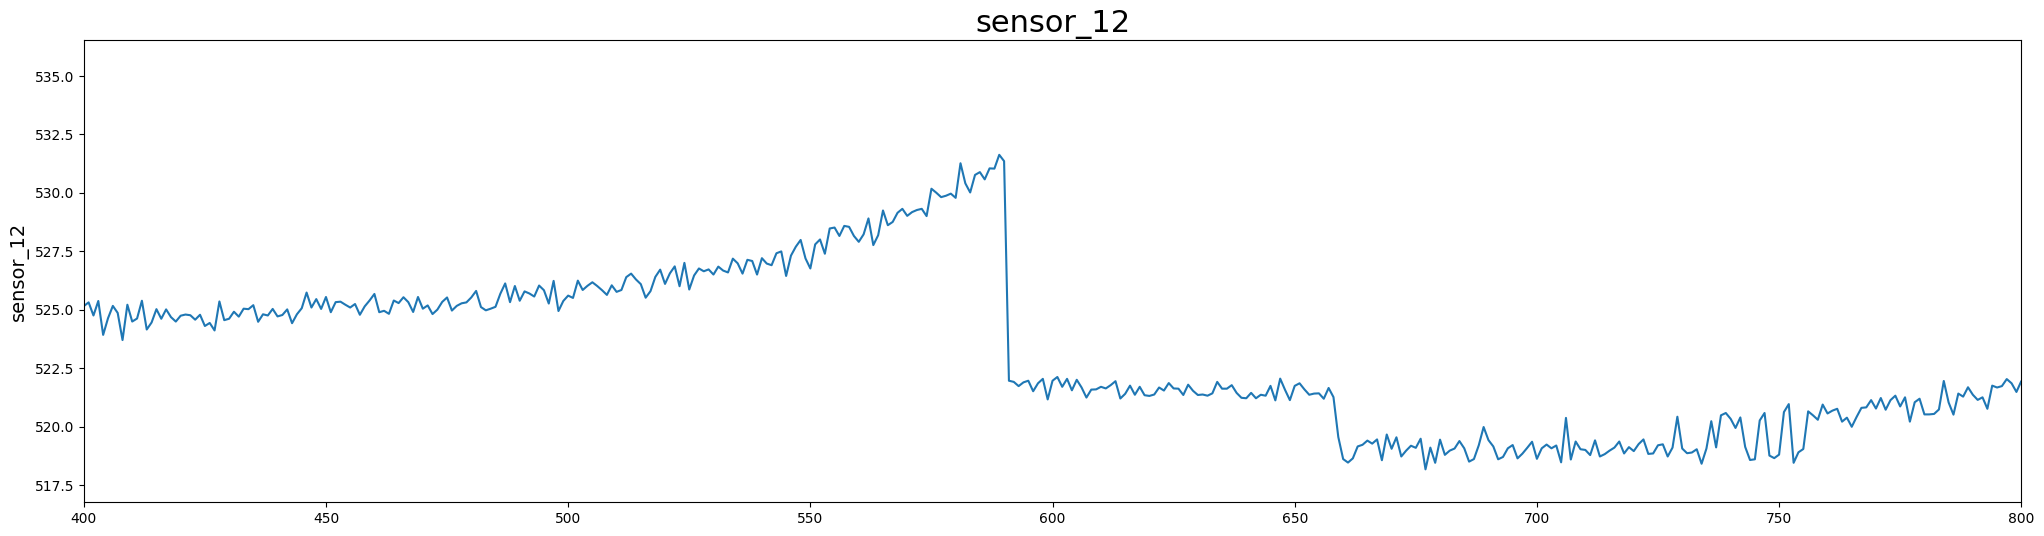

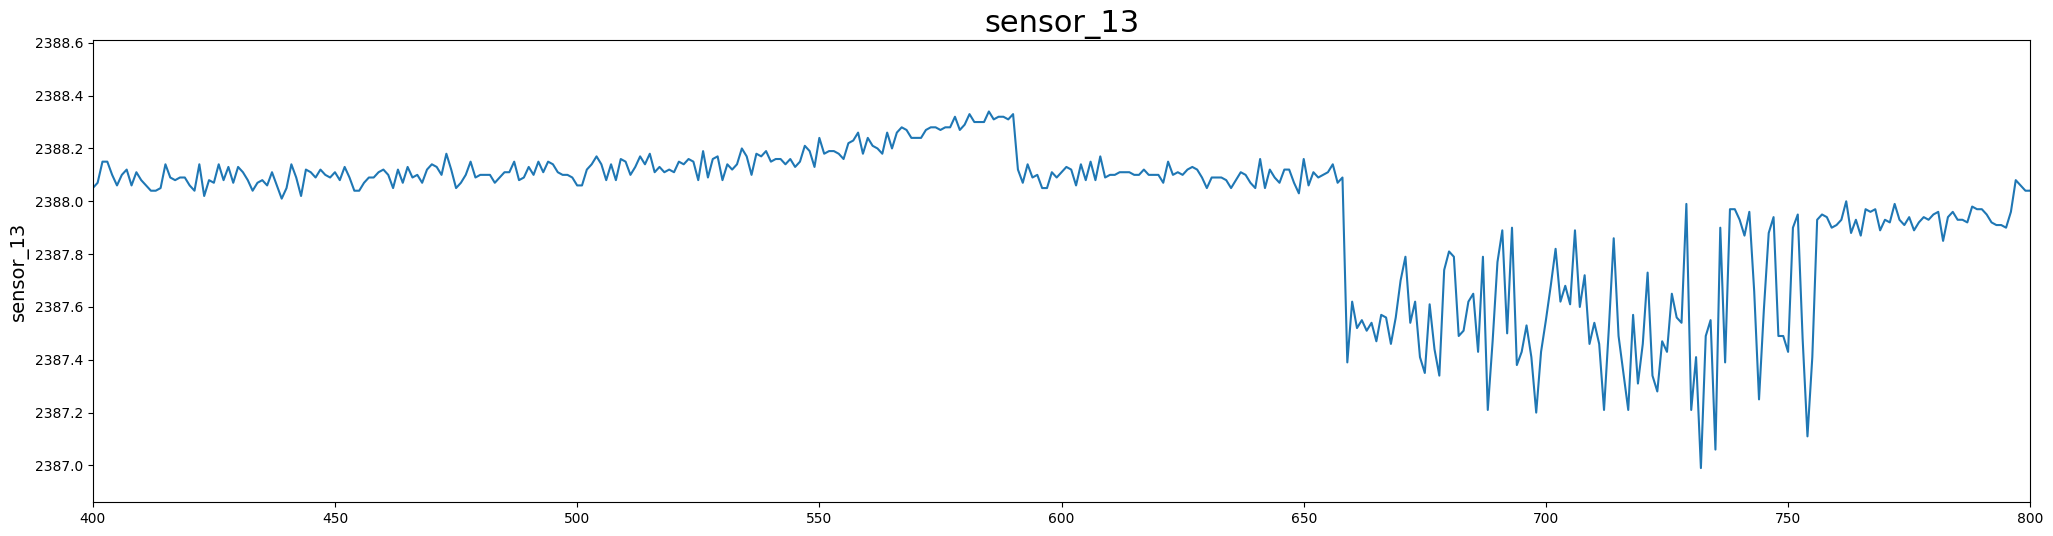

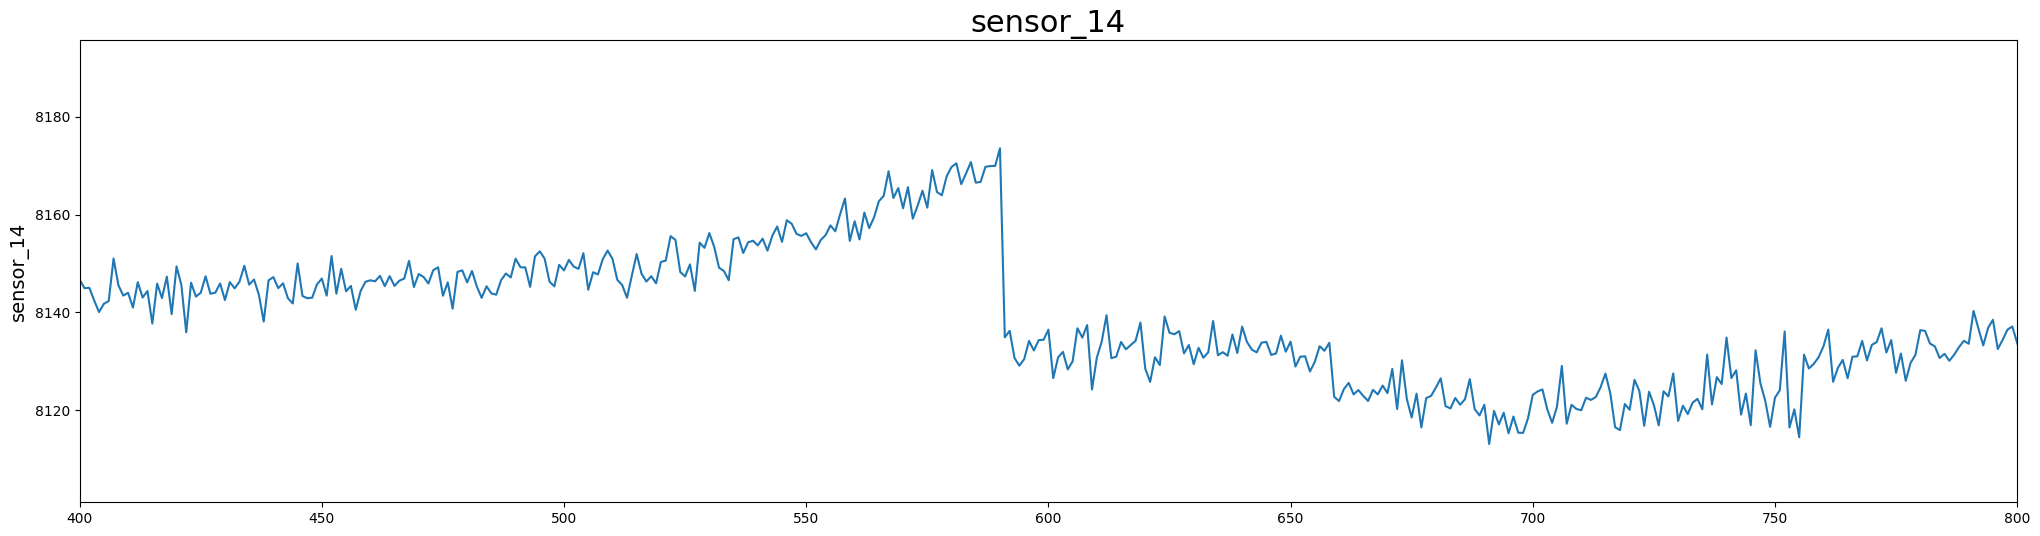

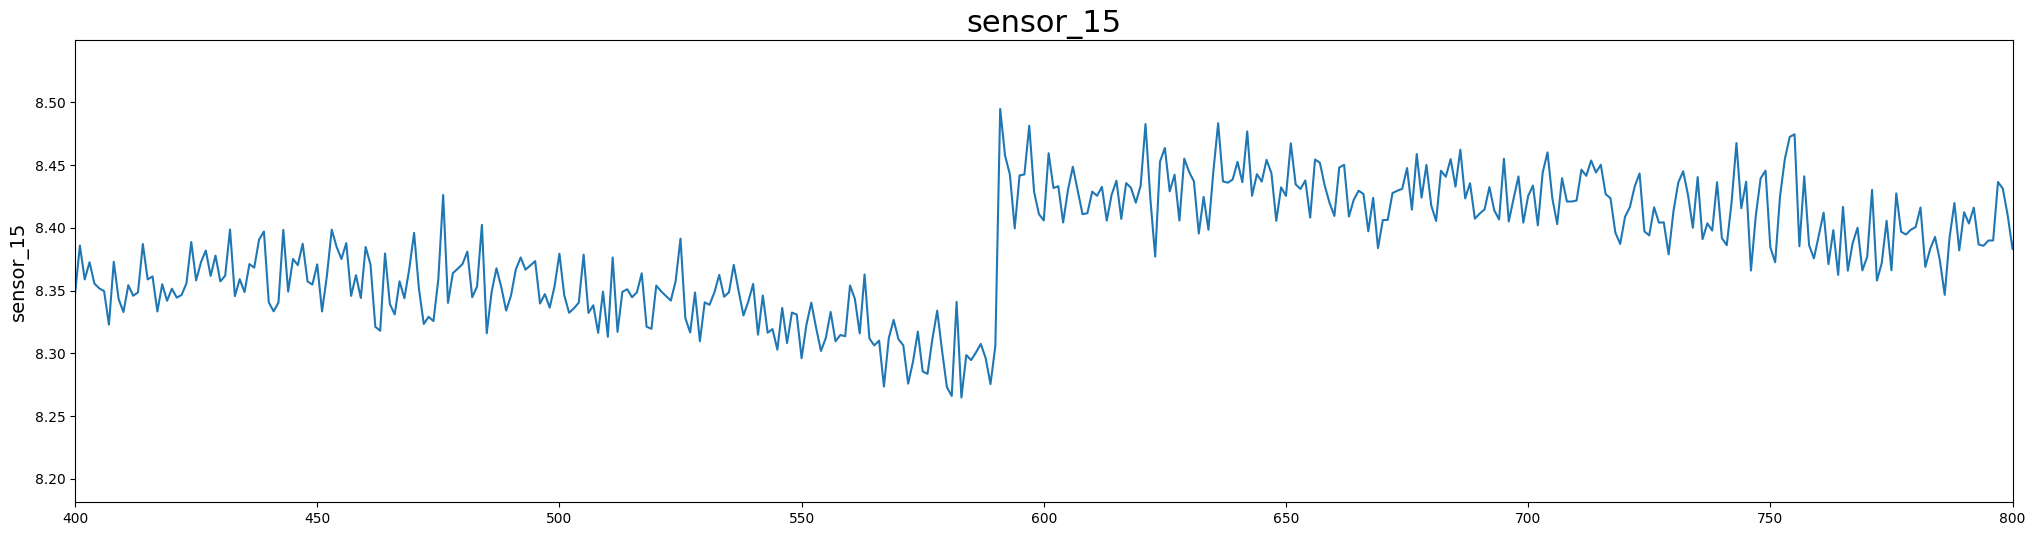

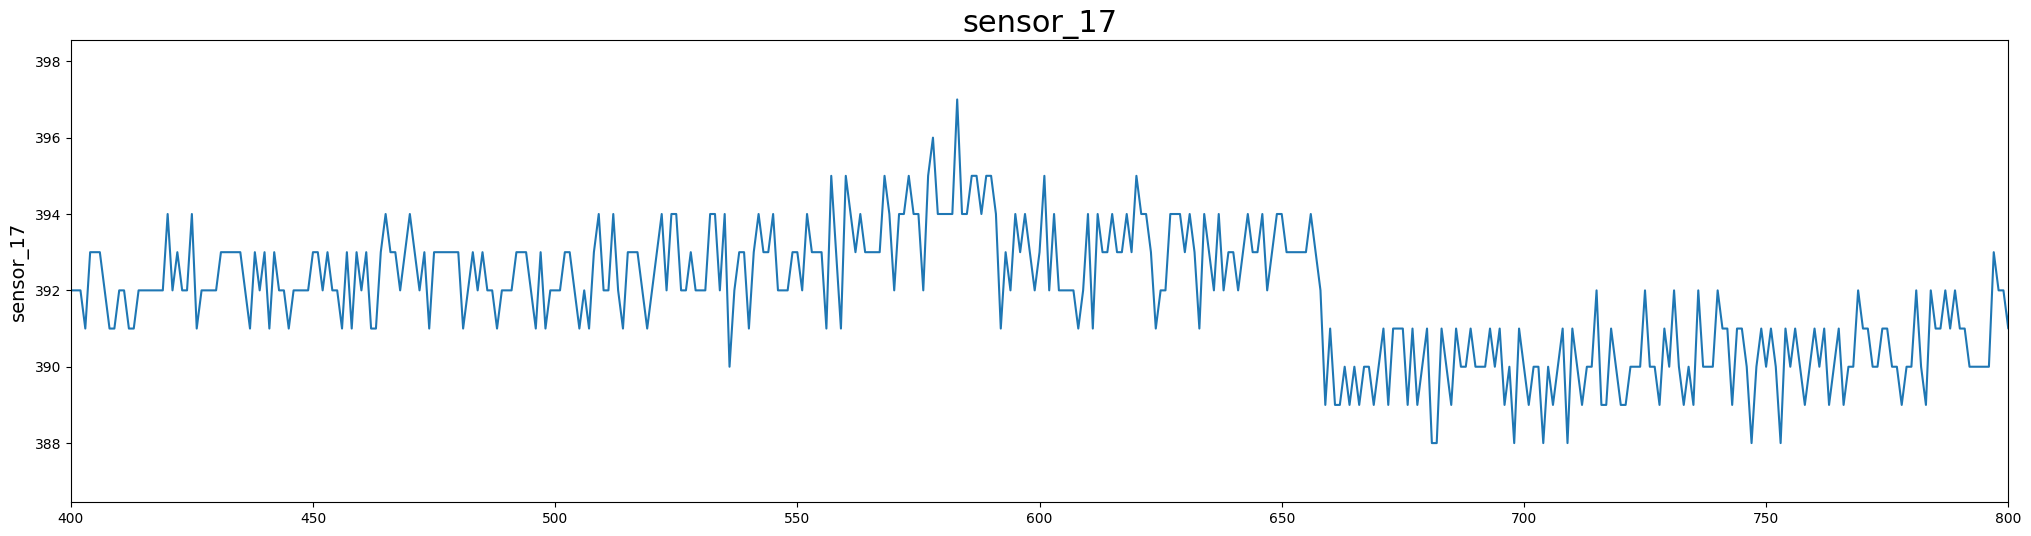

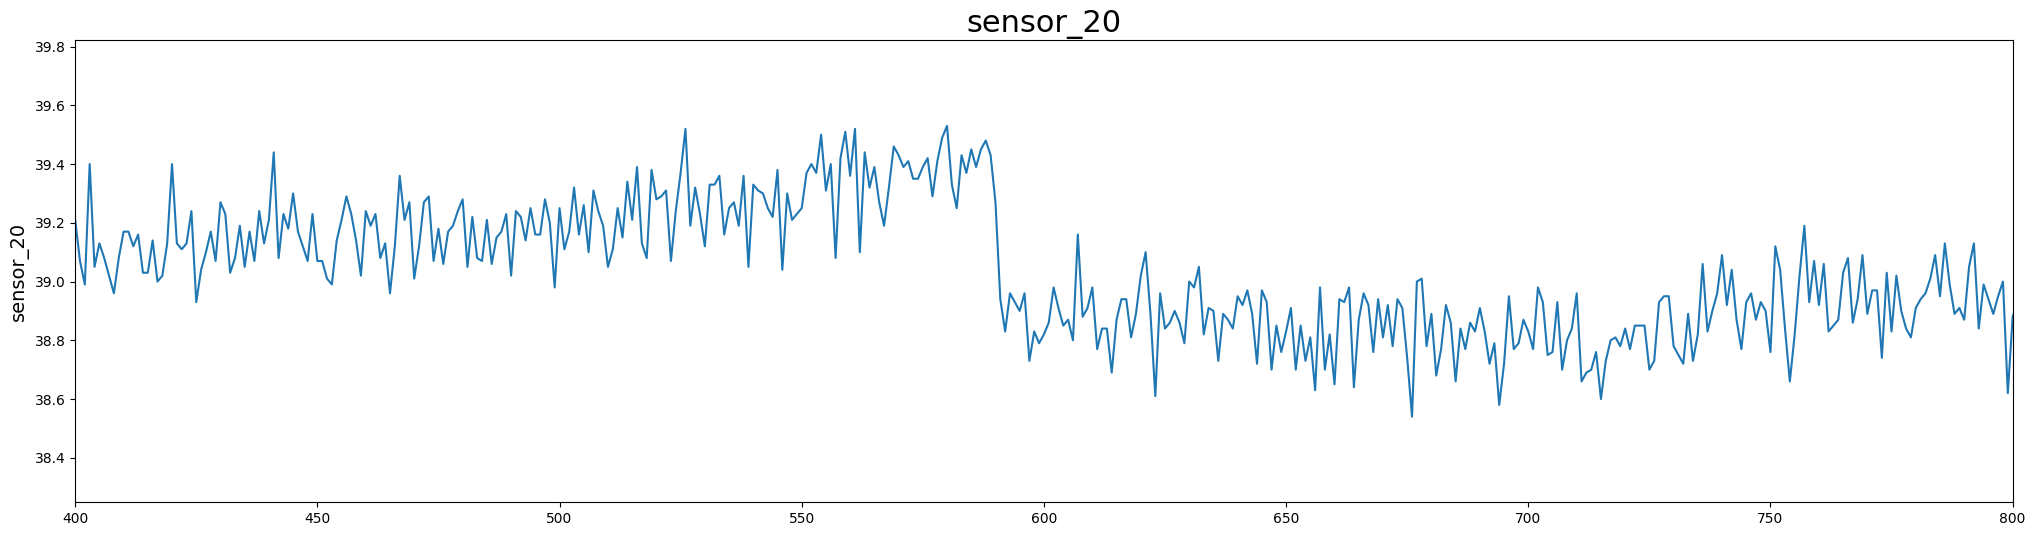

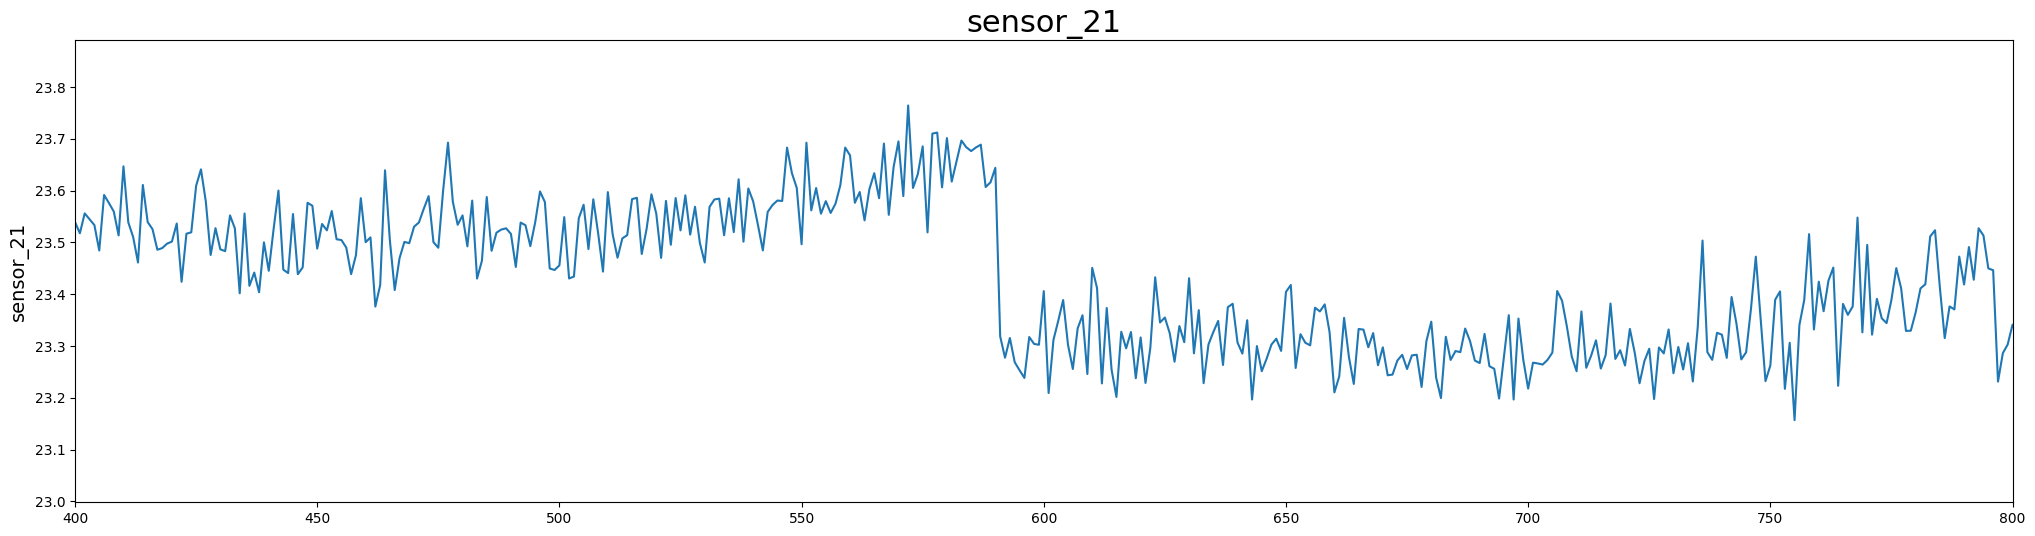

In [17]:
i = 0
for column in df_test.columns:
    if ('sensor' in column):
        fig, ax = plt.subplots(figsize=(25, 6))
        ax.plot(df_test.index.values, df_test[column].values)
        ax.set_ylabel(column, fontsize=14)
        ax.set_title(column, fontsize=22)
        ax.set_xlim(400,800)
        plt.show()

# Box plot dos sensores

C:\Users\Marcelo Aguiar\AppData\Local\Temp\ipykernel_43832\2362356700.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(25, 6))


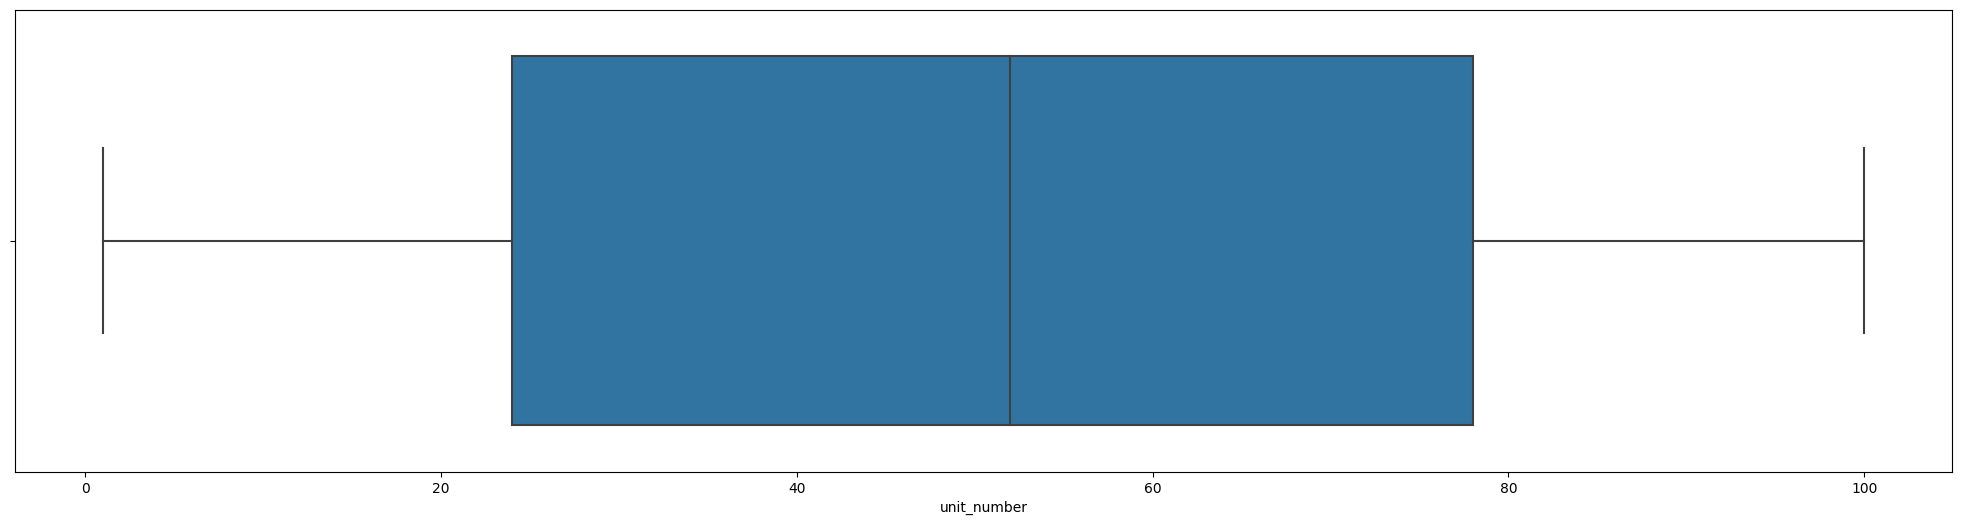

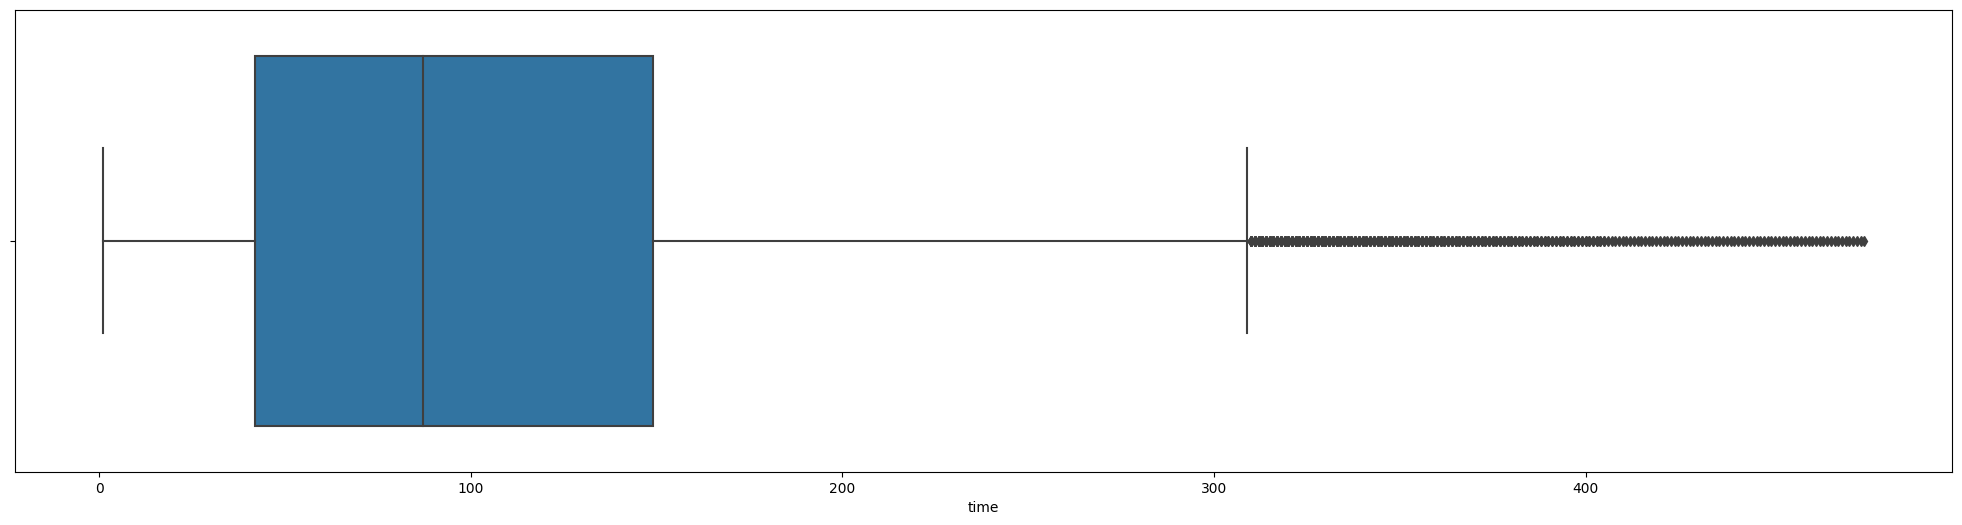

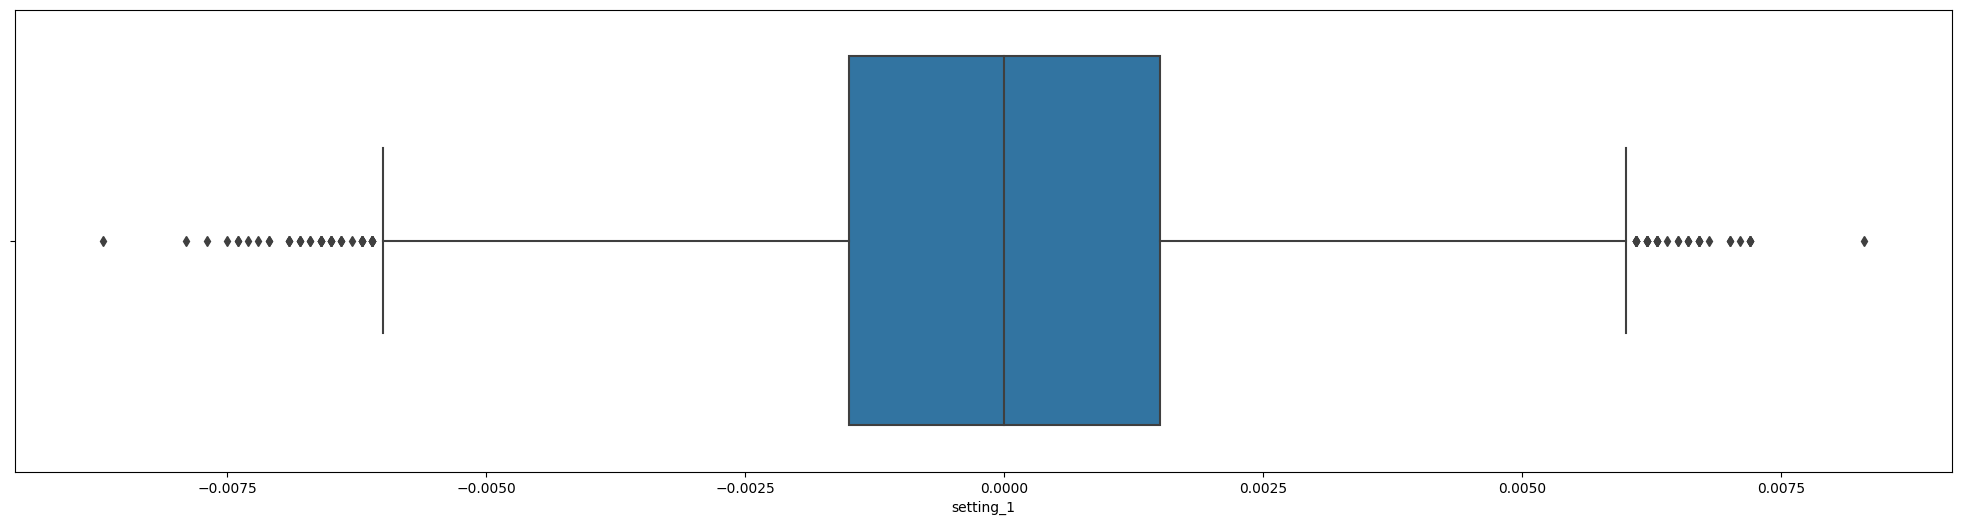

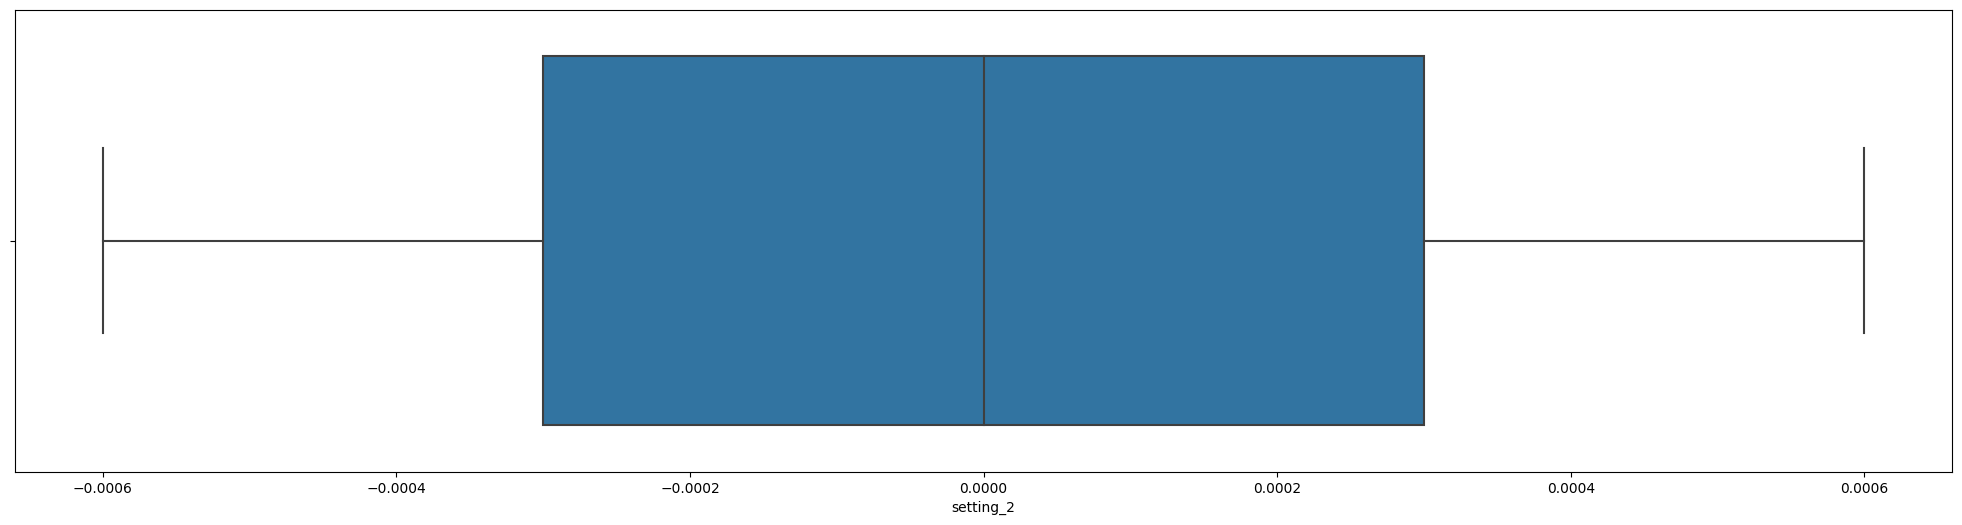

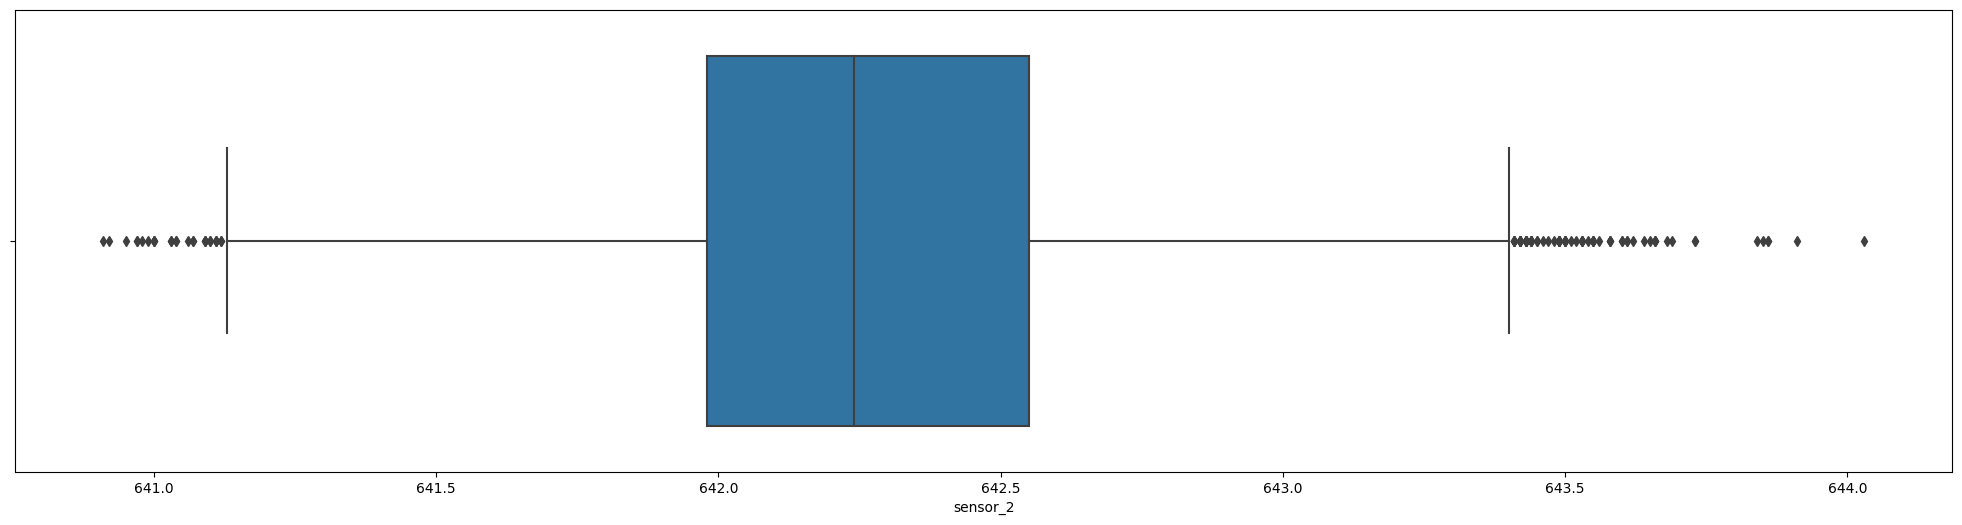

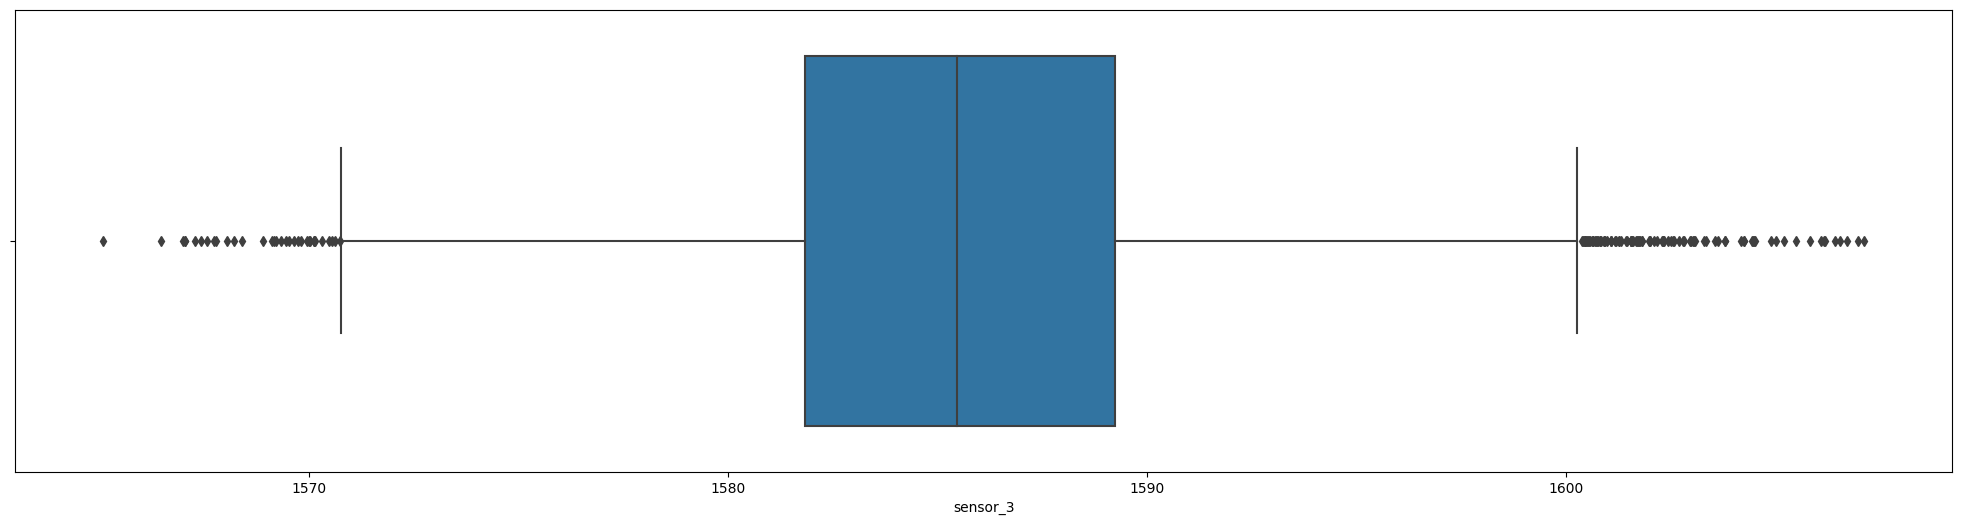

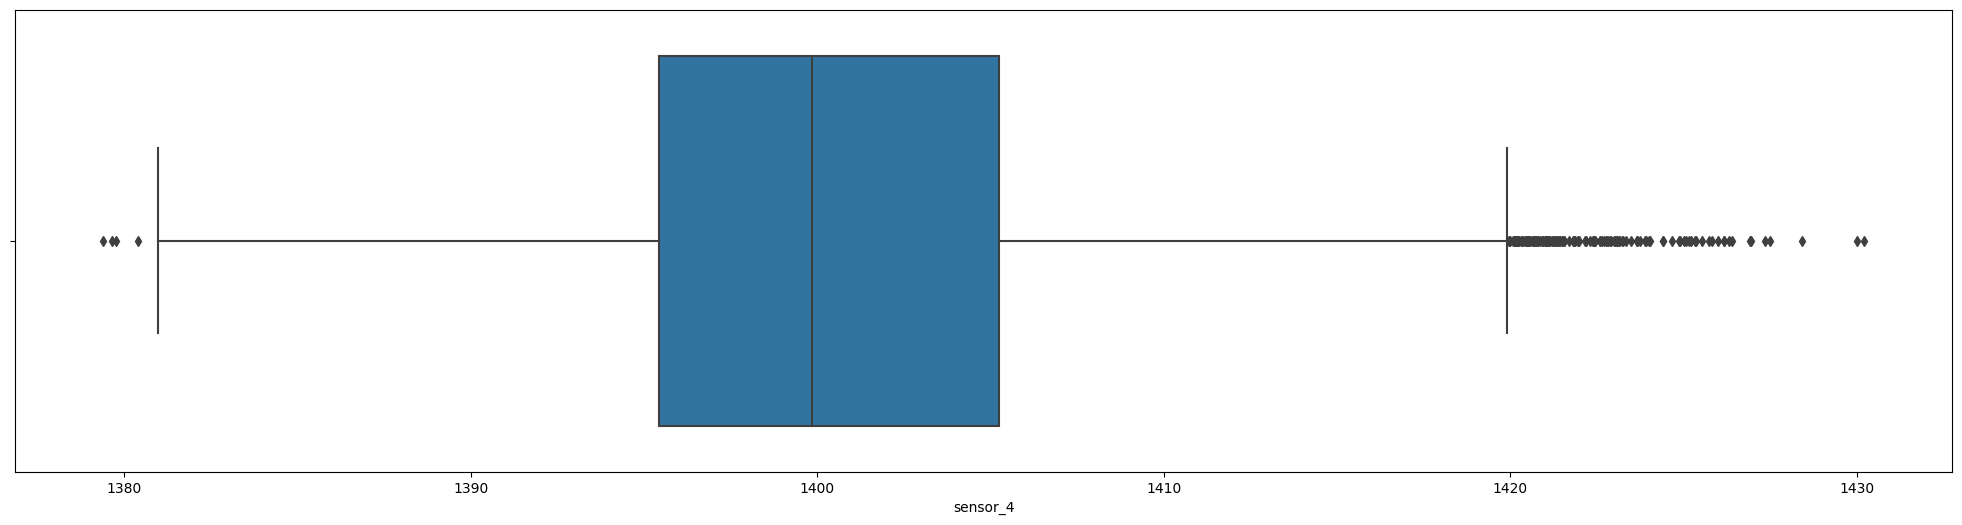

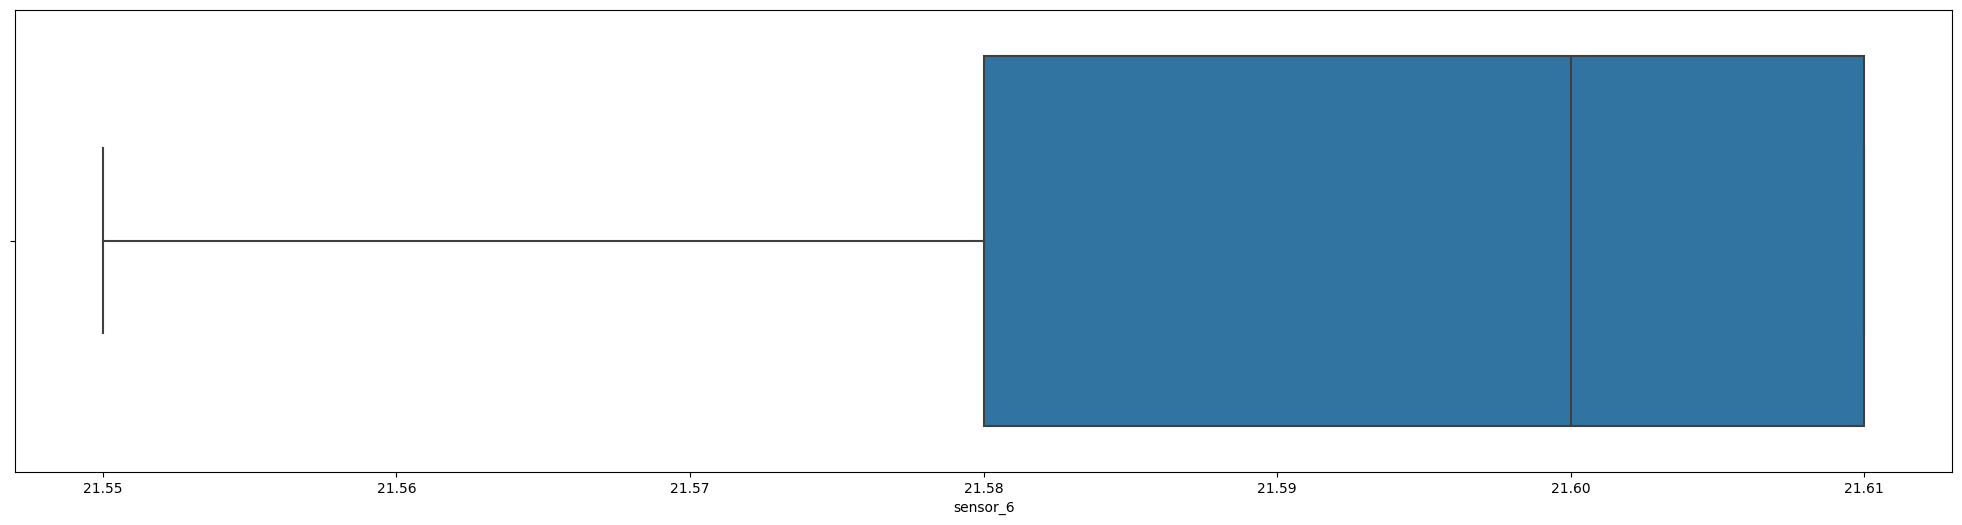

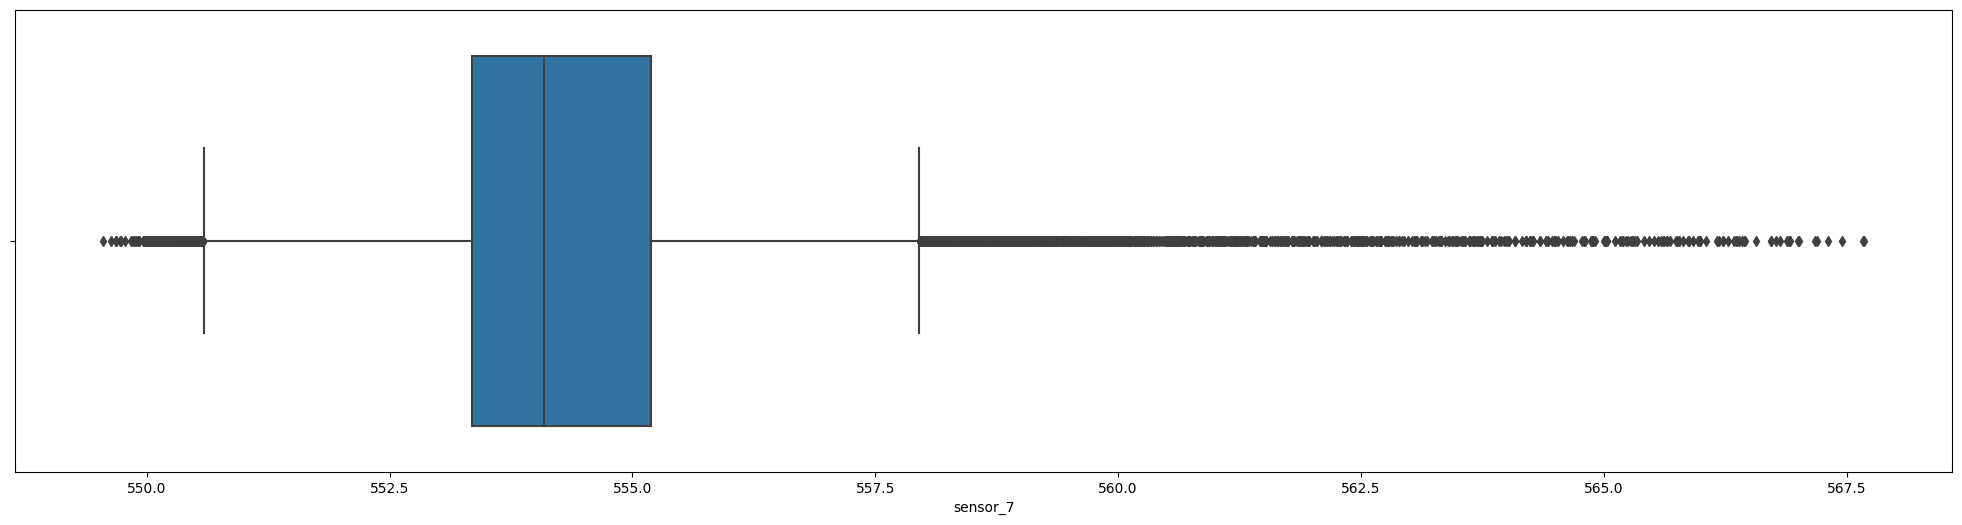

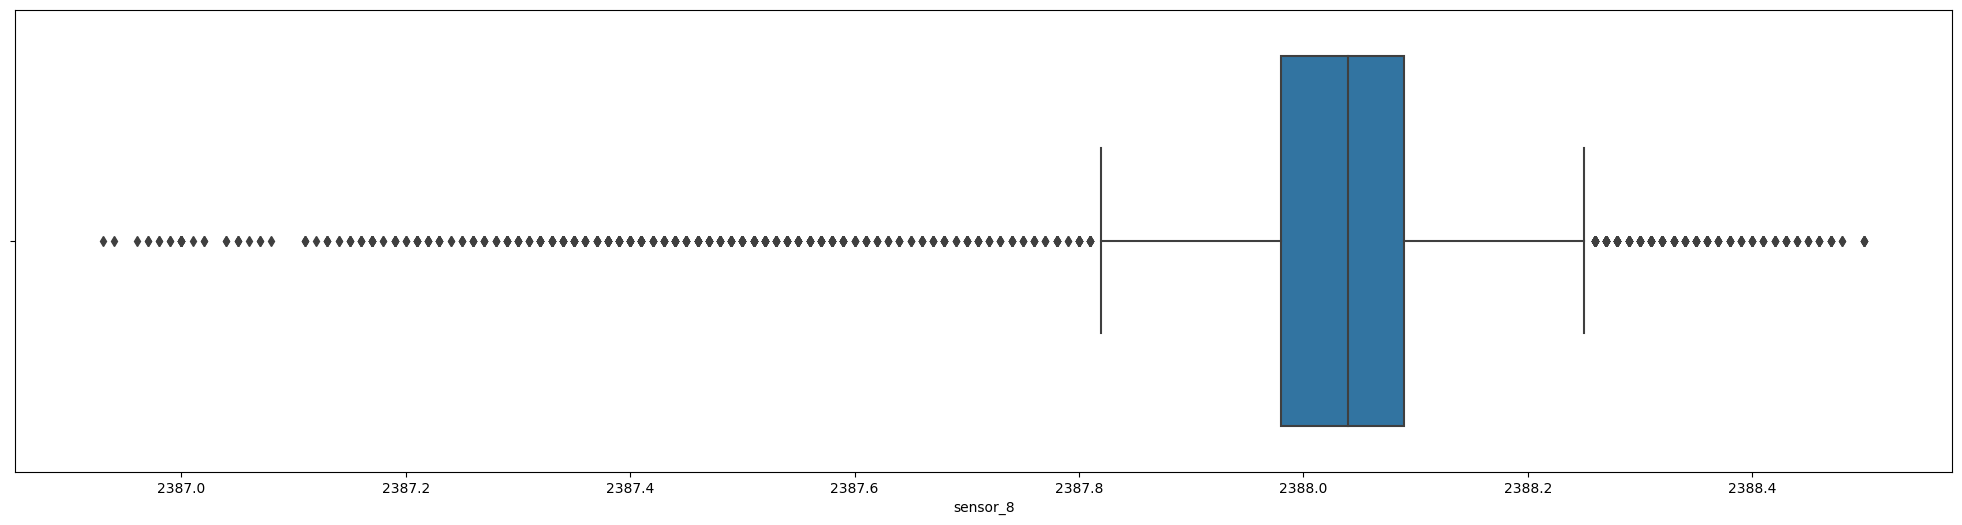

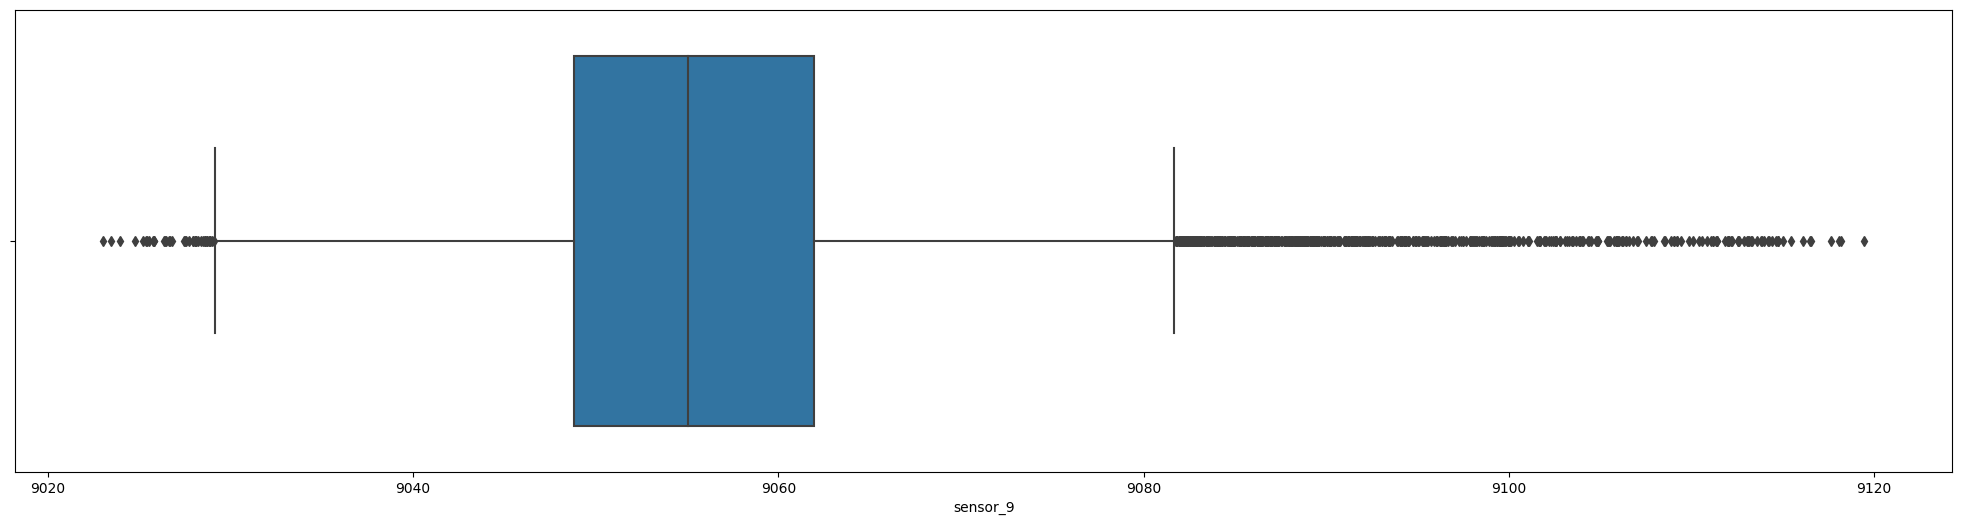

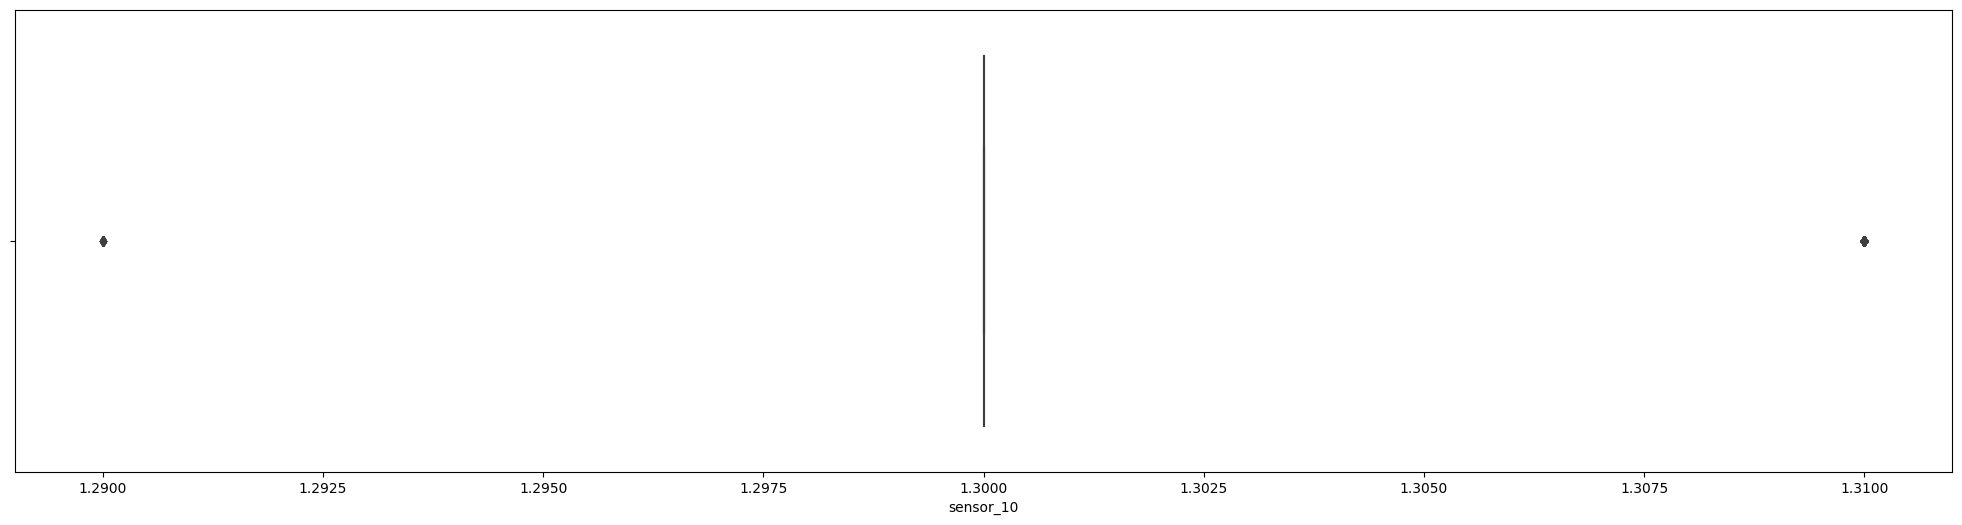

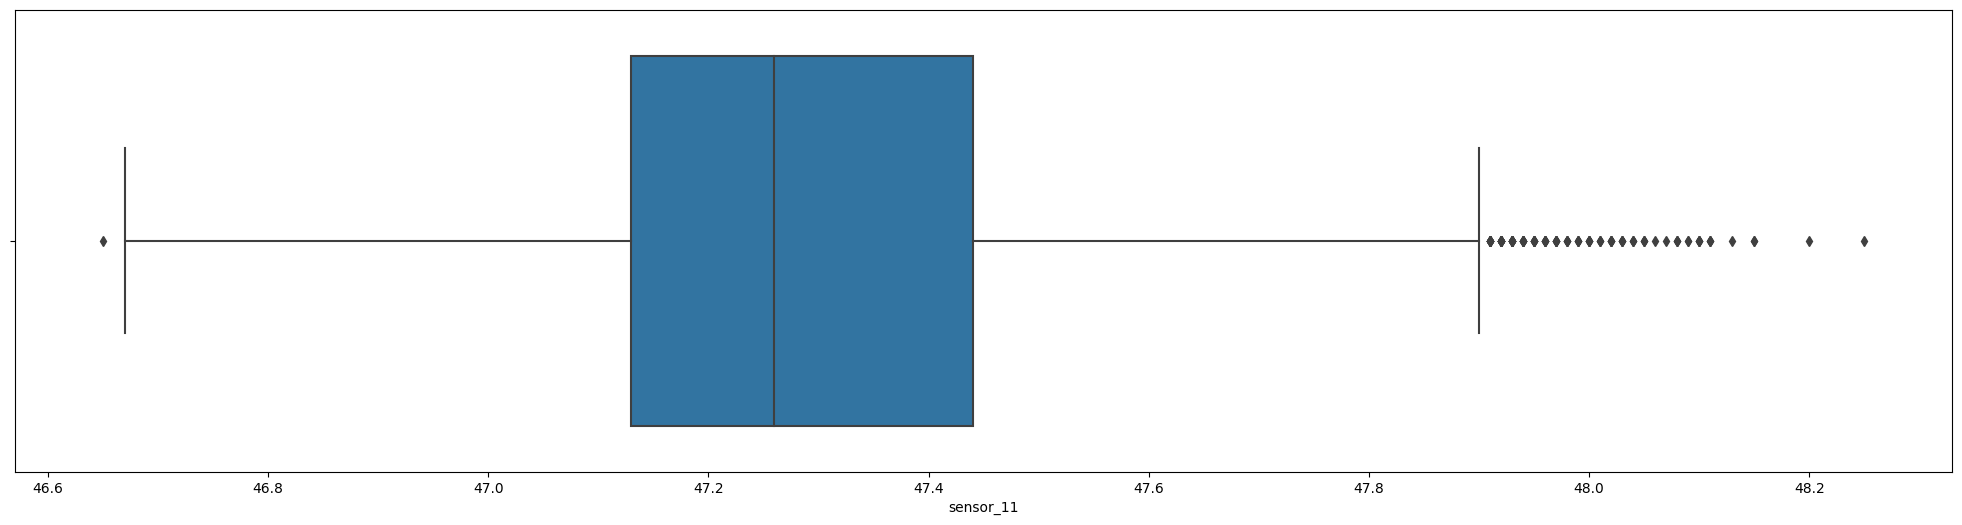

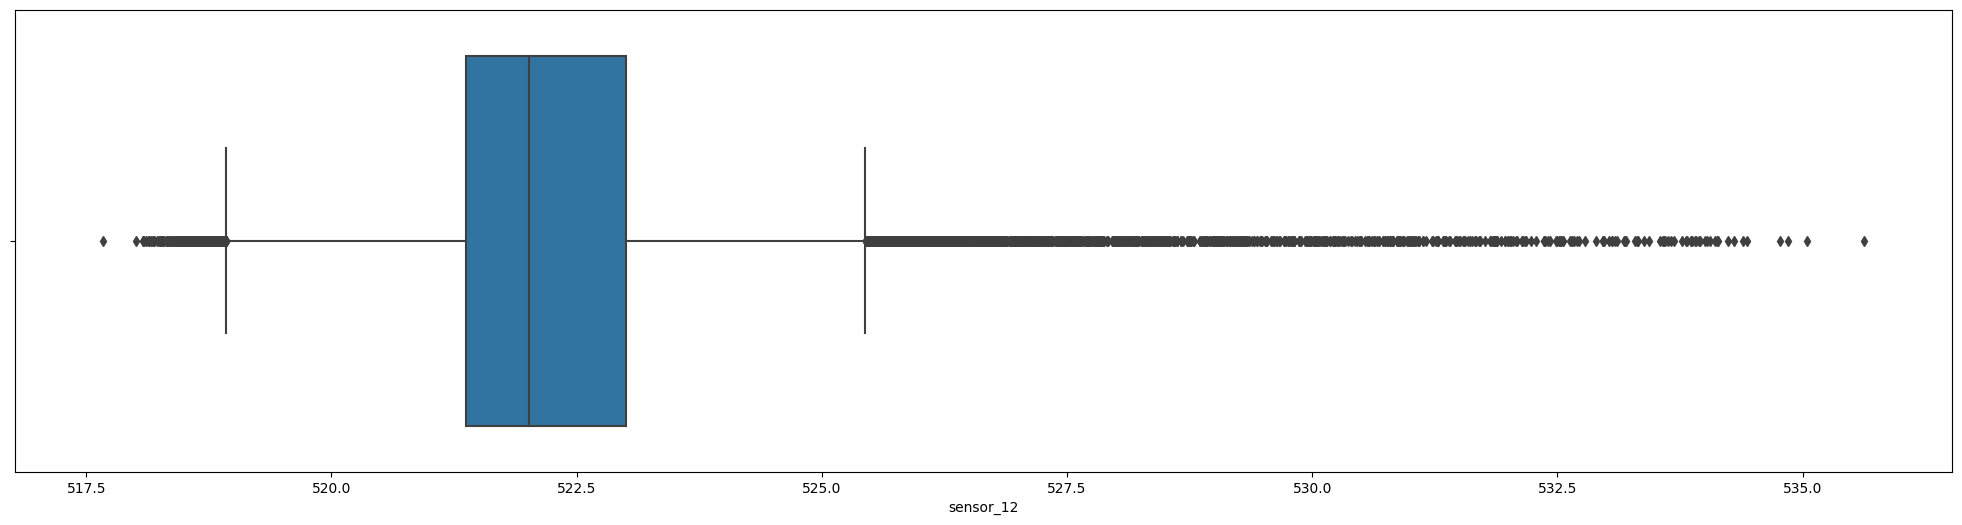

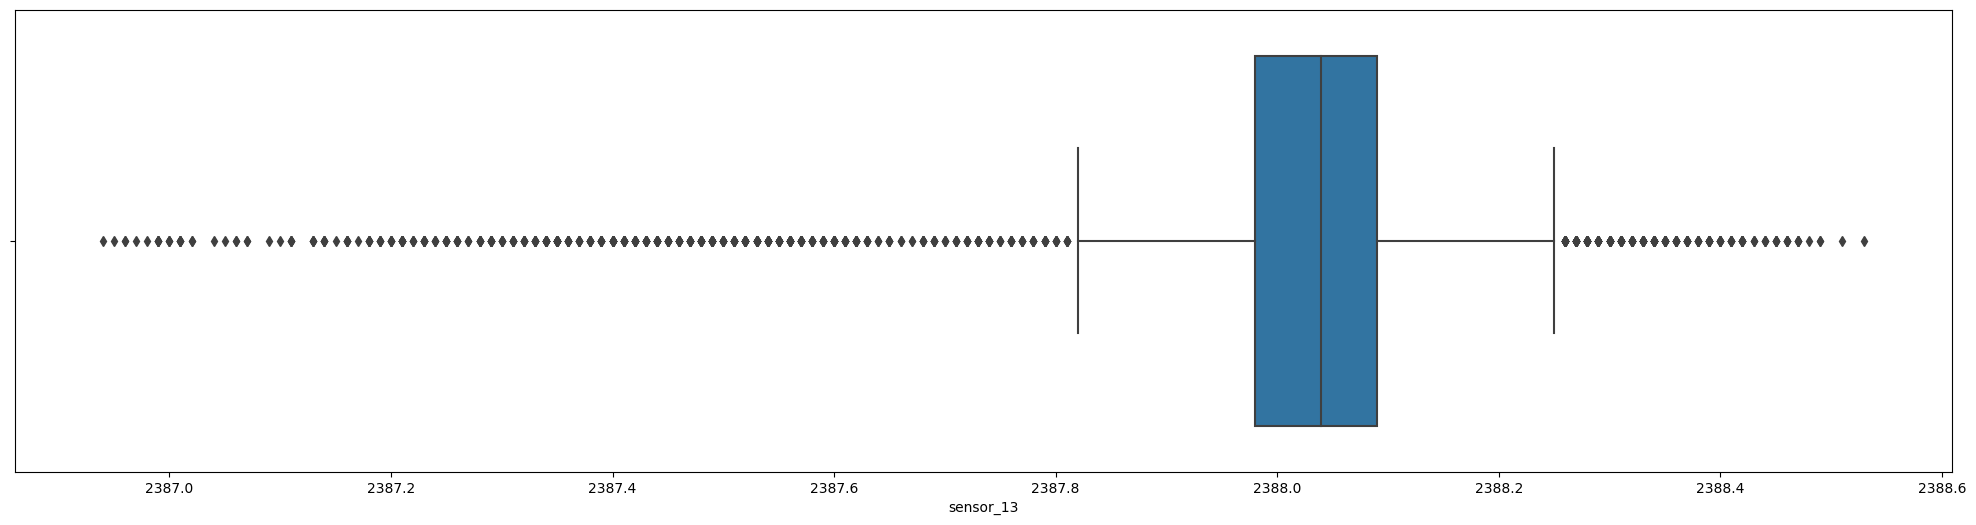

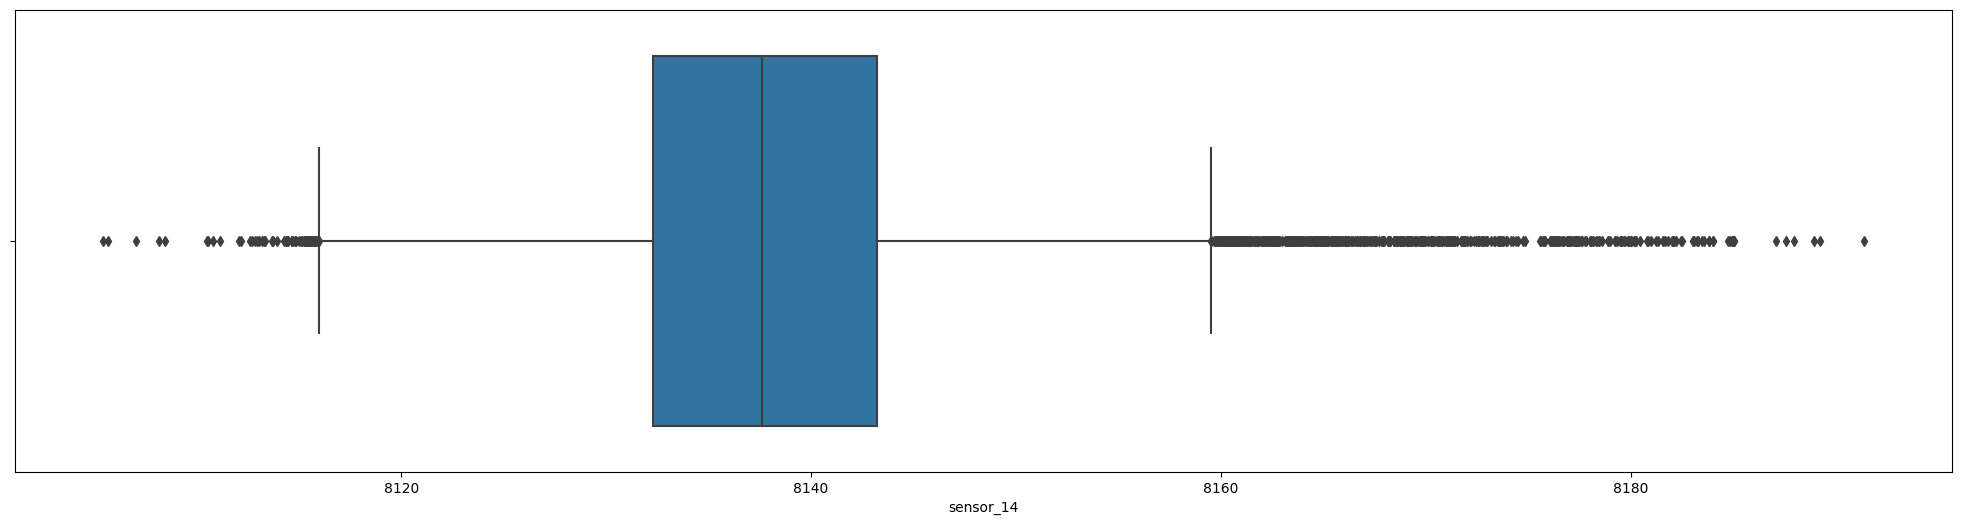

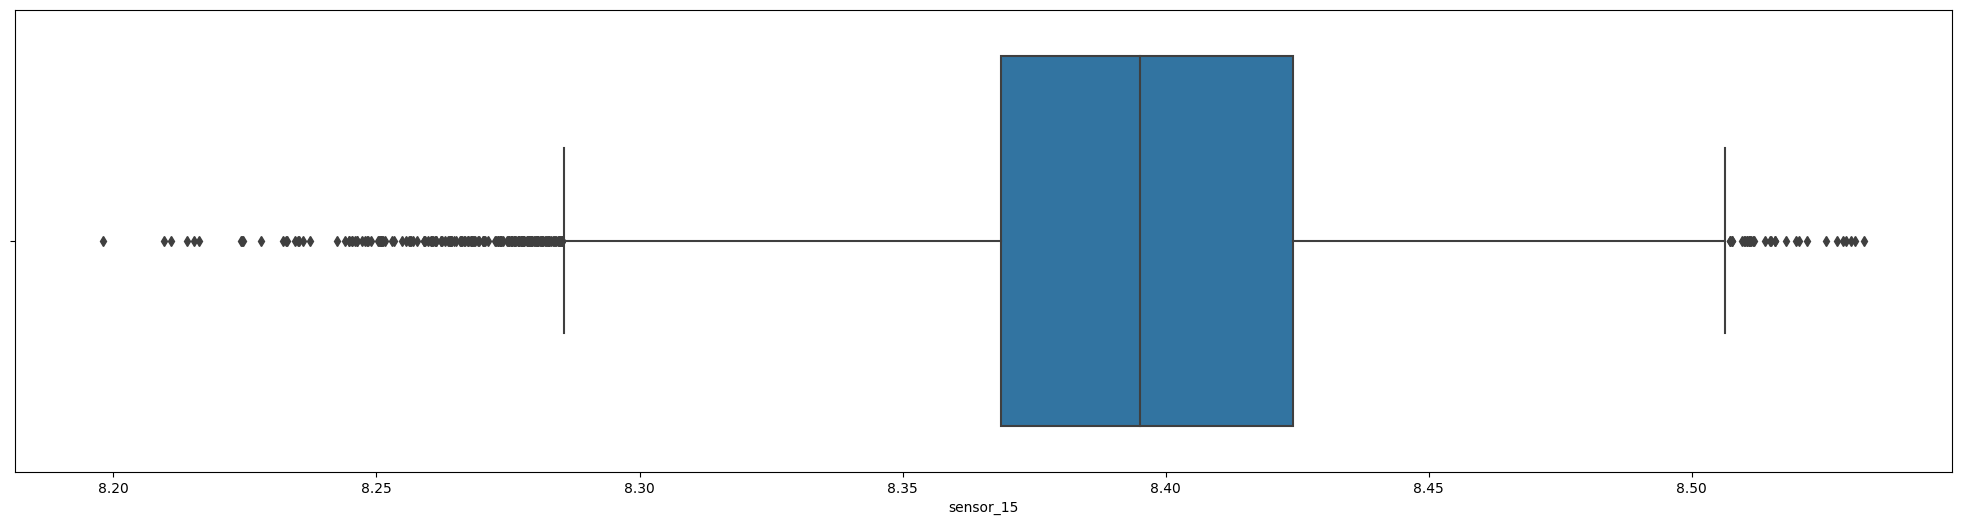

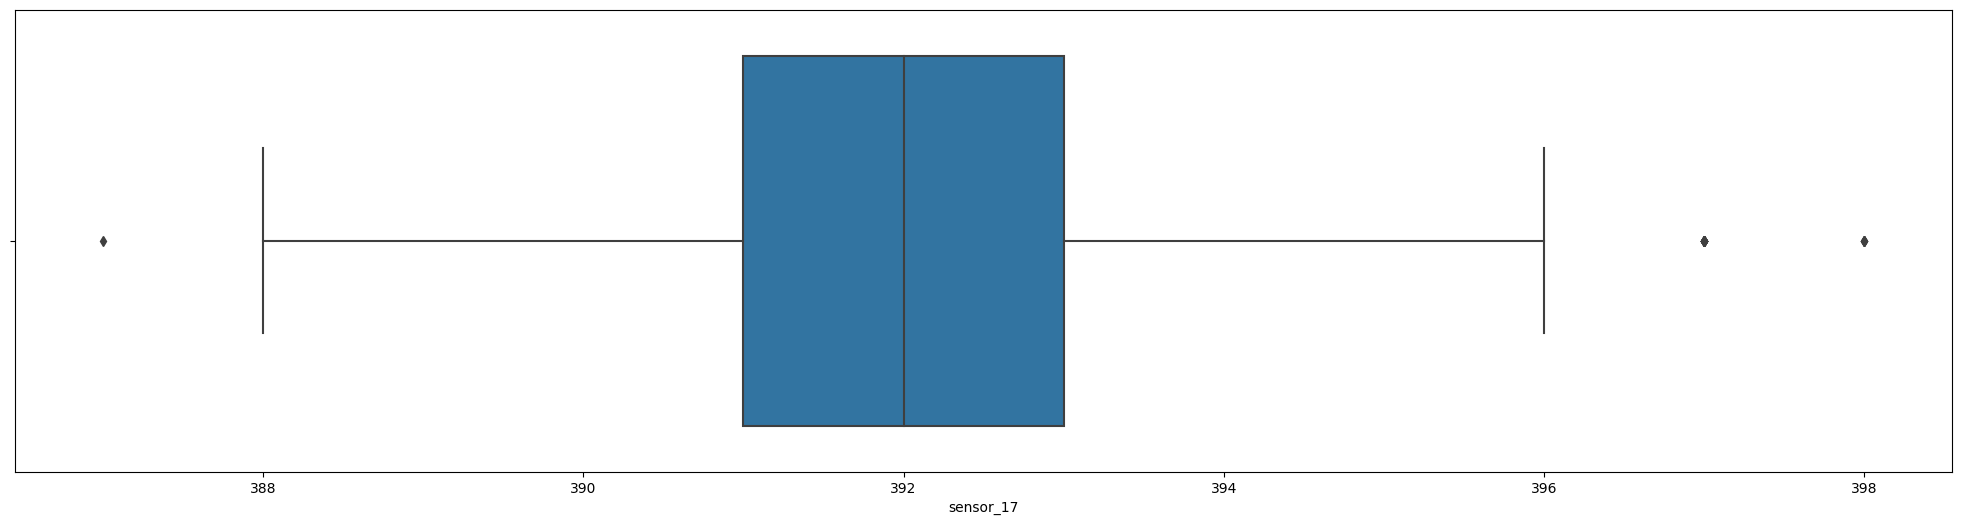

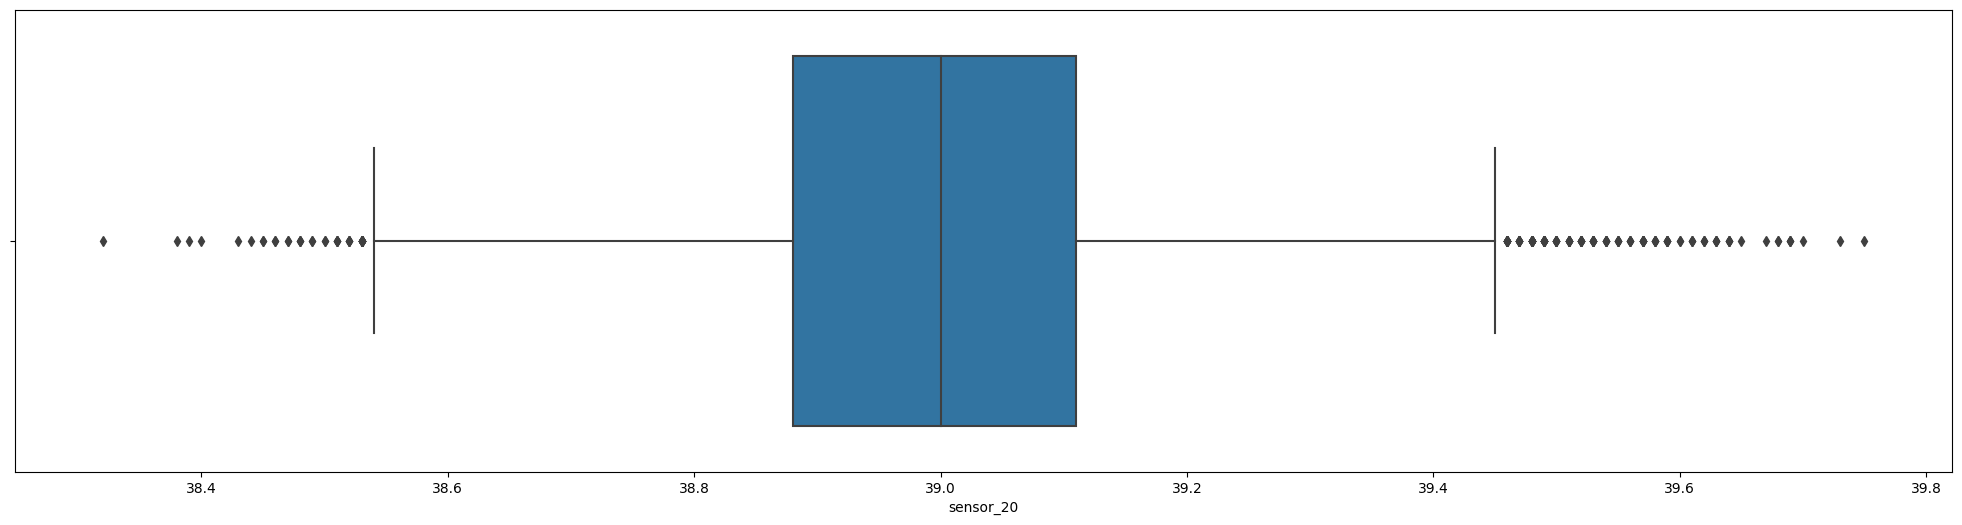

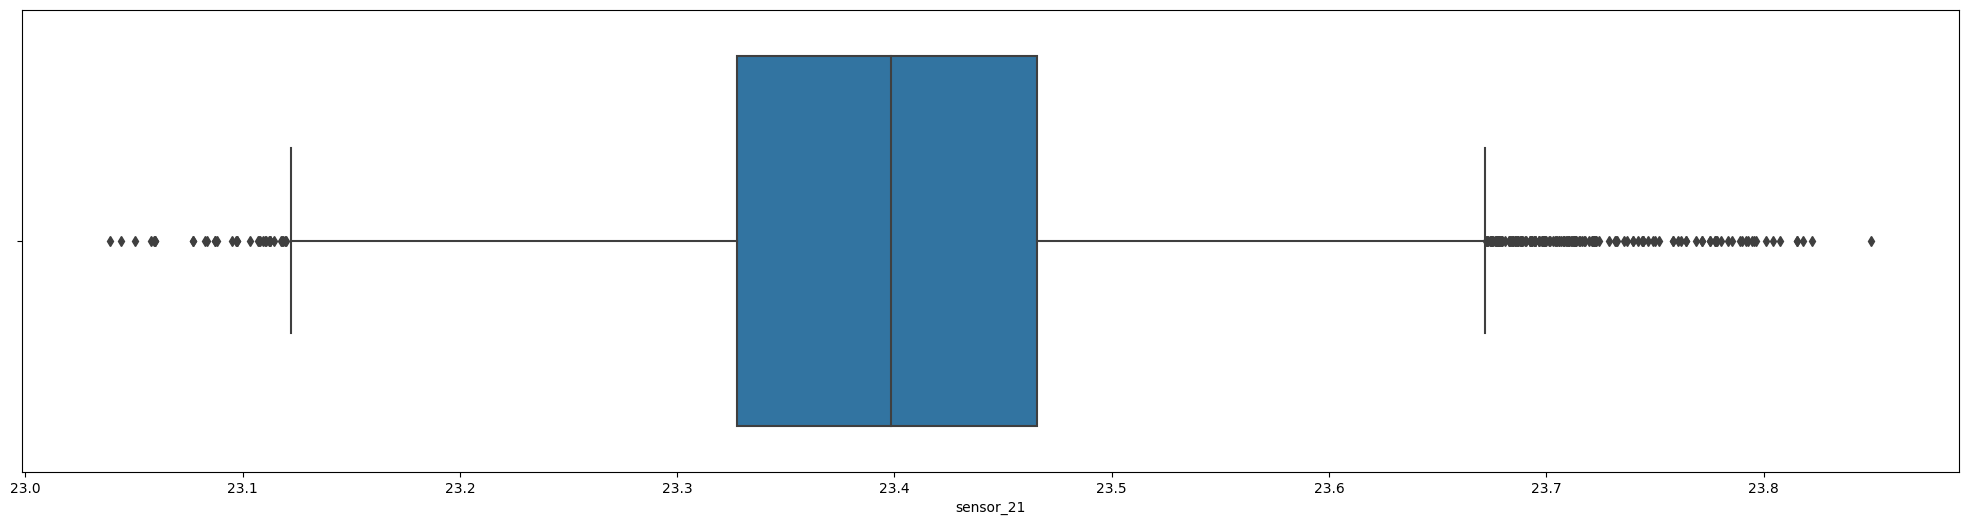

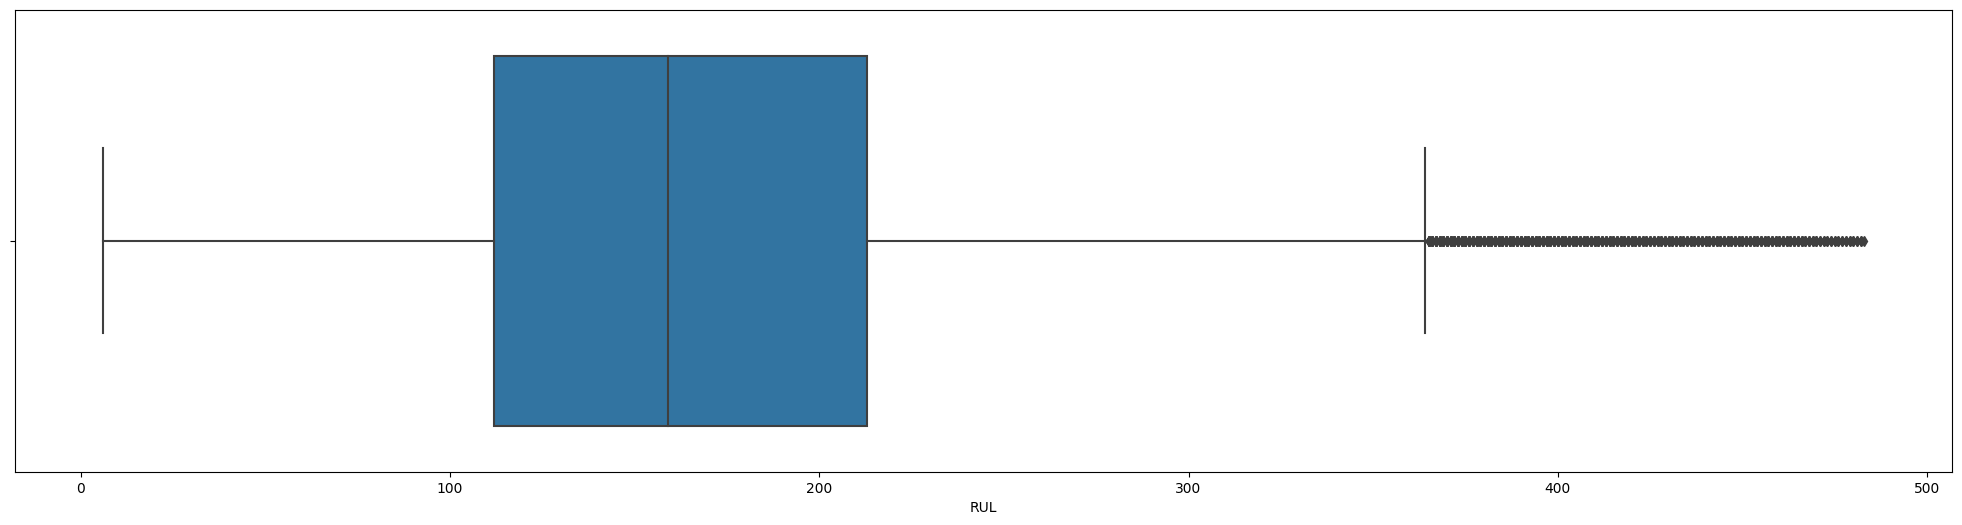

In [18]:
for column in df_test.columns:
    fig, ax = plt.subplots(figsize=(25, 6))
    sns.boxplot(data=df_test, x=column)
    plt.plot()

In [19]:
df_test.describe()

,unit_number,time,setting_1,setting_2,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,...,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,RUL
count,16596.000000,16596.000000,16596.000000,16596.000000,16596.00000,16596.000000,16596.000000,16596.000000,16596.000000,16596.000000,...,16596.000000,16596.000000,16596.000000,16596.000000,16596.000000,16596.000000,16596.000000,16596.000000,16596.000000,16596.000000
mean,51.887383,105.999518,-0.000017,-0.000004,642.26798,1585.608286,1400.567943,21.594215,554.555216,2388.021318,...,1.300456,47.290751,522.466597,2388.021013,8138.326536,8.395036,391.900036,38.996889,23.398909,169.877681
std,29.853523,83.286900,0.002201,0.000294,0.41885,5.538577,7.150365,0.016497,2.236182,0.150207,...,0.002121,0.217265,2.113488,0.149771,9.974272,0.041332,1.390909,0.174817,0.105415,84.226994
min,1.000000,1.000000,-0.008700,-0.000600,640.91000,1565.080000,1379.380000,21.550000,549.550000,2386.930000,...,1.290000,46.650000,517.670000,2386.940000,8105.450000,8.198000,387.000000,38.320000,23.039000,6.000000
25%,24.000000,42.000000,-0.001500,-0.000300,641.98000,1581.847500,1395.440000,21.580000,553.350000,2387.980000,...,1.300000,47.130000,521.370000,2387.980000,8132.310000,8.368700,391.000000,38.880000,23.327500,112.000000
50%,52.000000,87.000000,-0.000000,0.000000,642.24000,1585.460000,1399.840000,21.600000,554.090000,2388.040000,...,1.300000,47.260000,522.010000,2388.040000,8137.595000,8.395100,392.000000,39.000000,23.398500,159.000000
75%,78.000000,149.000000,0.001500,0.000300,642.55000,1589.240000,1405.230000,21.610000,555.190000,2388.090000,...,1.300000,47.440000,523.000000,2388.090000,8143.190000,8.424125,393.000000,39.110000,23.465400,213.000000
max,100.000000,475.000000,0.008300,0.000600,644.03000,1607.130000,1430.210000,21.610000,567.680000,2388.500000,...,1.310000,48.250000,535.630000,2388.530000,8191.380000,8.532800,398.000000,39.750000,23.849600,483.000000


# Conclusões

Pode observar que a vida restante do turbofan começa com valor elevado e vai descrescendo ao longo do tempo. Porém, nos dados de teste o RUL não chega igual a zero. Isso acontece pois é feito todo um tratamento com os dados de teste para se obter o valor verdadeiro do RUL. O que deverá ser feito no processamento para os dados de treino:
- **Remoção dos sensores flat**, incluindo o sensor 6.
- **Cálculo do RUL** (este cálculo é um pouco mais complexo).